
####  Thématique du projet

**Analyse et décision stratégique basée sur les comportements de paiement des clients dans le secteur bancaire.**

---

####  Méthodologie recommandée : CRISP-DM

Suivez les étapes suivantes pour structurer votre démarche :

1. **Compréhension du contexte métier**
2. **Exploration et préparation des données**
3. **Modélisation**
4. **Évaluation du modèle** (de manière concise)
5. **Prise de décision et recommandations**
6. **Déploiement** *(optionnel, mais encouragé)*

---

####  Note importante

> La partie **Analyse en Composantes Principales (PCA)** n’est **pas obligatoire**.  
> Toutefois, si vous choisissez de l’inclure, **elle sera valorisée comme bonus** dans l’évaluation.


In [51]:
%pip install -U scikit-learn==1.8.0



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
# Installation du paquet `ucimlrepo` pour accéder facilement aux datasets 
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**# Code pour importer le dataset :** 

In [53]:
# Importation de la fonction qui permet de récupérer les jeux de données UCI
from ucimlrepo import fetch_ucirepo 
  
# Chargement du dataset Bank Marketing via son identifiant (222) dans la base UCI
bank_marketing = fetch_ucirepo(id=222) 
  
# Récupération des données d'entrée (features) sous forme de DataFrame pandas
X = bank_marketing.data.features 

# Récupération de la variable cible (target) sous forme de DataFrame pandas
y = bank_marketing.data.targets 
  
# Affichage des métadonnées du dataset (nom, source, description, etc.)
print(bank_marketing.metadata) 
  
# Affichage des informations sur les variables (types, descriptions, etc.)
print(bank_marketing.variables)  

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

##### Informations principales extraites de `bank_marketing.metadata`
<h6>

<br>

| Élément                      | Détail |
|-----------------------------|--------|
| **Nom**                     | Bank Marketing |
| **Domaine**                 | Business |
| **Tâche principale**        | Classification |
| **Type de données**         | Multivariées (Catégorielles, Numériques) |
| **Nombre d’instances**      | 45 211 |
| **Nombre de variables**     | 16 features + 1 cible (`y`) |
| **Valeurs manquantes**      | Oui (`NaN`) |
| **Année de création**       | 2014 |
| **Dernière mise à jour**    | 18 août 2023 |
| **Lien UCI**                | [Bank Marketing @ UCI](https://archive.ics.uci.edu/dataset/222/bank+marketing) |
| **Objectif**                | Prédire si un client souscrira à un dépôt à terme |
| **Référence académique**    | [Moro et al., 2014](https://www.semanticscholar.org/paper/cab86052882d126d43f72108c6cb41b295cc8a9e) |
</h6>
---

#####  Structure des données (features et target)
<h6>


| Variable       | Type         | Description |
|----------------|--------------|-------------|
| `age`          | Integer      | Âge du client |
| `job`          | Categorical  | Type d’emploi |
| `marital`      | Categorical  | Statut marital |
| `education`    | Categorical  | Niveau d'éducation |
| `default`      | Binary       | Crédit en défaut ? |
| `balance`      | Integer      | Solde annuel moyen (en €) |
| `housing`      | Binary       | Prêt immobilier ? |
| `loan`         | Binary       | Prêt personnel ? |
| `contact`      | Categorical  | Type de contact |
| `day_of_week`  | Date         | Jour du dernier contact |
| `month`        | Date         | Mois du dernier contact |
| `duration`     | Integer      | Durée du contact (en secondes) |
| `campaign`     | Integer      | Nombre de contacts durant cette campagne |
| `pdays`        | Integer      | Jours depuis le dernier contact précédent |
| `previous`     | Integer      | Nombre de contacts avant cette campagne |
| `poutcome`     | Categorical  | Résultat de la campagne précédente |
| `y` (target)   | Binary       | Le client a-t-il souscrit un dépôt à terme ? |

</h6>

---


X et y on les sépare volontairement pour : L’analyse, le nettoyage et surtout la modélisation supervisée.

**# Inspection rapide de X et y :** 

In [54]:
X.head()
y.value_counts()

y  
no     39922
yes     5289
Name: count, dtype: int64

####  Analyse :

- Le jeu de données est **fortement déséquilibré** :
  - **88.3%** de clients ont **refusé** de souscrire (`no`)
  - **11.7%** ont **accepté** l’offre (`yes`)

---

**# Statistiques descriptives :** 

In [55]:
X.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN


####  Conclusion 
-  **`balance`** contient des valeurs négatives très élevées (jusqu’à -8019€). Il est recommandé de :
  - Vérifier s’il s’agit de découverts bancaires légitimes ou de valeurs aberrantes.
  - Appliquer une transformation ou exclure les valeurs extrêmes si elles biaisent l’analyse.

-  Plusieurs variables catégorielles comme `job`, `education`, `contact`, `poutcome` présentent des **valeurs manquantes** ou codées comme `"unknown"`. Il est conseillé de :
  - Les imputer avec la modalité la plus fréquente ou les traiter séparément.
  - Les encoder correctement pour les modèles (OneHot, Label Encoding…).

-  La variable cible `y` est fortement déséquilibrée (~88% de "no") :
  - Il faudra adapter les méthodes de modélisation et utiliser des **métriques robustes** (F1-score, AUC).
  - Envisager des techniques de **rééquilibrage** comme SMOTE ou la pondération des classes.

-  Les variables comme `pdays`, `campaign`, `duration` sont très **asymétriques** :
  - Envisager des **transformations log** ou du **binning** pour améliorer l’interprétabilité et la performance des modèles.

 ✅ Le dataset est globalement cohérent mais nécessite :
  - Un **nettoyage**,
  - Une **standardisation des formats**,
  - Et une **vérification approfondie des extrêmes et valeurs manquantes**.

  ---


**# Analyse des valeurs manquantes :** 

In [56]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


#####  Analyse des valeurs manquantes

<h6>

| Variable     | Valeurs manquantes | Pourcentage (sur 45211) | Commentaire |
|--------------|---------------------|---------------------------|-------------|
| `job`        | 288                 | ~0.64%                    | Faible, imputable facilement |
| `education`  | 1857                | ~4.1%                     | Modéré, à traiter avec soin |
| `contact`    | 13020               | ~28.8%                    | ⚠️ Élevé, nécessite analyse approfondie |
| `poutcome`   | 36959               | ~81.8%                    | ⚠️⚠️ Très élevé, souvent dû à l'absence de campagnes précédentes |
| Autres       | 0                   | 0%                        | Aucun traitement nécessaire |

</h6>


#####  Recommandations

<h6>

 **`job`** :
  - Faible taux de valeurs manquantes → remplacer par la **valeur la plus fréquente** (`mode`) ou ajouter une catégorie `"unknown"`.

 **`education`** :
  - 4% de valeurs manquantes → imputation par la modalité dominante ou création d’une classe spécifique.

 **`contact`** :
  - Taux important (~29%) :
    - Option 1 : remplacer les `NaN` par `"unknown"` si cela représente des non-contactés.
    - Option 2 : examiner l’impact de la suppression sur le volume total.

 **`poutcome`** :
  - Très forte proportion de `NaN` (82%) liée à l’absence de contact passé :
    - Remplacer par `"non_contacté"` ou `"unknown"` pour **préserver l’information implicite**.
    - Supprimer la variable si elle s’avère inutile à la modélisation.

</h6>

---


**# Nettoyage des données :** 

In [57]:
#  Création de copies de travail
X_cleaned = X.copy()
y_cleaned = y.copy()

#  Imputation des valeurs manquantes 

# 1. 'job' → remplir avec la modalité la plus fréquente
X_cleaned['job'] = X_cleaned['job'].fillna(X_cleaned['job'].mode()[0])

# 2. 'education' → remplir avec la modalité la plus fréquente
X_cleaned['education'] = X_cleaned['education'].fillna(X_cleaned['education'].mode()[0])

# 3. 'contact' → remplacer les NaN par 'unknown'
X_cleaned['contact'] = X_cleaned['contact'].fillna('unknown')

# 4. 'poutcome' → remplacer les NaN par 'non_contacté'
X_cleaned['poutcome'] = X_cleaned['poutcome'].fillna('non_contacté')

#  Vérification finale des valeurs manquantes
print("Valeurs manquantes restantes :", X_cleaned.isnull().sum().sum())

#  Suppression des doublons
nb_duplicated = X_cleaned.duplicated().sum()
print(f"Nombre de doublons : {nb_duplicated}")

X_cleaned = X_cleaned.drop_duplicates()
y_cleaned = y_cleaned.loc[X_cleaned.index]

#  Dimensions finales
print("Dimensions finales :", X_cleaned.shape, y_cleaned.shape)


Valeurs manquantes restantes : 0
Nombre de doublons : 0
Dimensions finales : (45211, 16) (45211, 1)



**# Analyse du nettoyage des données :**  

<h6>


#####  Valeurs manquantes restantes : `0`
Toutes les colonnes ont été nettoyées avec succès :
- Les imputations ont été appliquées correctement sur `job`, `education`, `contact`, et `poutcome`.
- Aucune ligne supprimée inutilement.  
✅ **Les données sont désormais complètes.**

---

#####  Nombre de doublons : `0`
Aucun doublon détecté :
- Le jeu de données ne contenait pas de lignes identiques.
- Aucune suppression de lignes nécessaire.  
✅ **Données uniques et prêtes pour l'analyse.**

---

#####  Dimensions finales :
- `X_cleaned` : **(45211, 16)**  
- `y_cleaned` : **(45211, 1)**

Cela signifie que :
- **Tous les clients (45211)** sont conservés.
- **Toutes les variables explicatives (16)** sont présentes.
- La variable cible `y` est bien **alignée** avec les entrées.  


</h6>

In [58]:
# Fusion des variables et de la cible
df_cleaned = X_cleaned.copy()
df_cleaned['y'] = y_cleaned['y'] 

# Affichage des premières lignes du tableau 
df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,non_contacté,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,non_contacté,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,non_contacté,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,non_contacté,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,non_contacté,no



#####  Conclusion
 Le nettoyage a été réalisé **avec succès**, sans perte d'information.  

---


**# Encodage des variables catégorielles :**   

In [59]:
from pandas import get_dummies  # Import spécifique uniquement pour l'encodage

# Sélection des colonnes de type object
cat_cols = X_cleaned.select_dtypes(include='object').columns.tolist()
print("Colonnes catégorielles à encoder :", cat_cols)

# Encodage One-Hot (suppression de la première modalité pour éviter la redondance)
X_encoded = get_dummies(X_cleaned, columns=cat_cols, drop_first=True)

# Affichage des dimensions après transformation
print("Dimensions après encodage :", X_encoded.shape)

Colonnes catégorielles à encoder : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Dimensions après encodage : (45211, 40)


##### 📋 Colonnes catégorielles encodées

| N° | Colonne     |
|----|-------------|
| 1  | job         |
| 2  | marital     |
| 3  | education   |
| 4  | default     |
| 5  | housing     |
| 6  | loan        |
| 7  | contact     |
| 8  | month       |
| 9  | poutcome    |


<h6>
#####  Dimensions après encodage

- **Dimensions après encodage** : `(45211, 40)`

✅ **Lignes** : inchangées (**45 211 clients**)

✅ **Colonnes** : passées de **16 à 40**, ce qui est attendu :

- `7` colonnes **numériques** inchangées (ex : `age`, `balance`, etc.)
- `9` colonnes **catégorielles** transformées en **33 colonnes binaires**  
  *(grâce à `drop_first=True` qui évite la redondance multicolinéaire)*

</h6>

---


**#  Analyse des corrélations :**  

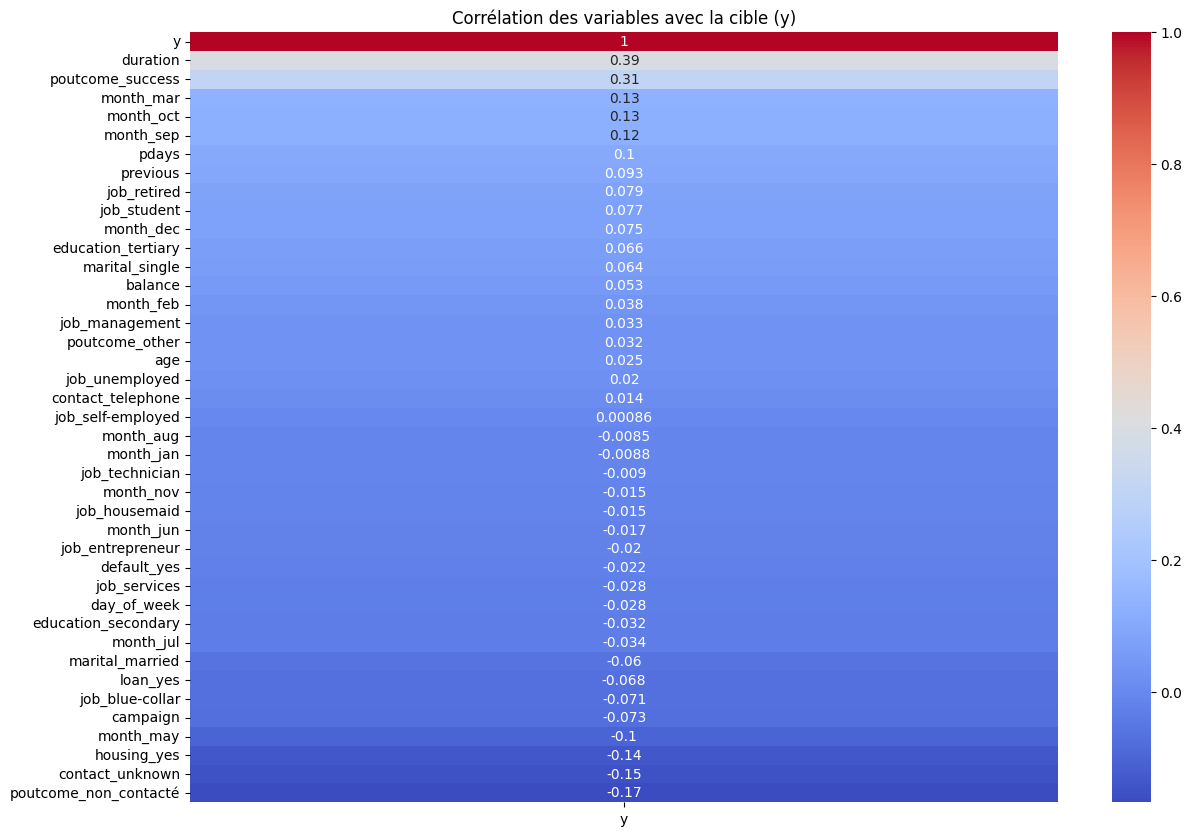

In [60]:
from seaborn import heatmap
from matplotlib.pyplot import figure, title, show
from pandas import concat

#  Conversion de la cible binaire
y_binary = y_cleaned.copy()
y_binary['y'] = y_binary['y'].map({'yes': 1, 'no': 0})

#  Fusion des données pour analyse de corrélation
df_corr = concat([X_encoded, y_binary], axis=1)

#  Matrice de corrélation
corr_matrix = df_corr.corr(numeric_only=True)

#  Affichage de la heatmap centrée sur la variable cible
figure(figsize=(14, 10))
heatmap(corr_matrix[['y']].sort_values(by='y', ascending=False), annot=True, cmap='coolwarm')
title("Corrélation des variables avec la cible (y)")
show()

In [61]:
y.describe()

,y
count,45211
unique,2
top,no
freq,39922



---

#### OBJECTIFS


- **Aider la banque à décider quels clients cibler pour souscrire à des dépôts à terme**

---

**#  Code pour top 5 corrélations positives et négatives :**  

In [62]:
# Extraction des corrélations avec la cible
y_corr = corr_matrix['y'].drop('y')  # on enlève la corrélation de y avec lui-même

# Top 5 corrélations positives
top_pos = y_corr.sort_values(ascending=False).head(5)

# Top 5 corrélations négatives
top_neg = y_corr.sort_values().head(5)

# Affichage sous forme de tableaux
print("🔼 Top 5 variables les plus positivement corrélées à y :\n")
print(top_pos.to_frame(name='Corrélation'))

print("\n🔽 Top 5 variables les plus négativement corrélées à y :\n")
print(top_neg.to_frame(name='Corrélation'))

🔼 Top 5 variables les plus positivement corrélées à y :

                  Corrélation
duration             0.394521
poutcome_success     0.306788
month_mar            0.129456
month_oct            0.128531
month_sep            0.123185

🔽 Top 5 variables les plus négativement corrélées à y :

                       Corrélation
poutcome_non_contacté    -0.167051
contact_unknown          -0.150935
housing_yes              -0.139173
month_may                -0.102500
campaign                 -0.073172


##### 📊 Analyse descriptive des facteurs influençant la souscription à un dépôt à terme

---

#####  Variables les plus influentes positivement

<h6>

| Variable           | Corrélation | Analyse |
|--------------------|-------------|---------|
| `duration`         | +0.39       | Il s'agit de la variable la plus fortement corrélée à la cible. Plus l'appel téléphonique est long, plus la probabilité que le client souscrive augmente.  |
| `poutcome_success` | +0.31       | Un client ayant déjà répondu positivement à une campagne passée est bien plus susceptible de souscrire à nouveau. Historique relationnel très utile. |
| `month_mar`, `month_oct`, `month_sep` | ~+0.12–0.13 | Ces mois montrent un meilleur taux de conversion, ce qui peut être exploité pour planifier les campagnes marketing durant des périodes propices. |

</h6>
---

#####  Variables les plus influentes négativement

<h6>

| Variable                | Corrélation | Analyse |
|-------------------------|-------------|---------|
| `poutcome_non_contacté` | -0.17       | Les clients n’ayant jamais été contactés dans une campagne précédente sont moins enclins à accepter l’offre, faute d'engagement préalable. |
| `contact_unknown`       | -0.15       | L’absence de canal de communication clair est défavorable. Cela peut indiquer un manque de personnalisation ou un ciblage inefficace. |
| `month_may`             | -0.10       | Bien que beaucoup de campagnes aient lieu en mai, ce mois est paradoxalement associé à un taux de conversion plus bas – potentiellement dû à une saturation des sollicitations. |
| `campaign`              | -0.073      | Un nombre élevé de contacts pendant la campagne est associé à une diminution du taux de souscription, soulignant l’importance de ne pas harceler le client. |
| `job_blue-collar`       | -0.071      | Ce segment socioprofessionnel montre une réticence plus marquée à souscrire, peut-être en lien avec un profil plus prudent ou moins d'intérêt pour ce produit financier. |

</h6>
---

- Les variables **démographiques classiques** comme `age`, `balance`, `education`, ou `marital` ont un **impact limité** sur la décision (corrélations faibles).
- Le **type de canal de communication** est un levier stratégique : les appels mobiles (vs. téléphone fixe ou inconnu) montrent de meilleurs résultats.
- La variable `duration` étant déterminée *après* l’appel, elle ne peut pas être utilisée pour prédire en amont — mais elle **explique très bien** le comportement final.

---



 <div style="display: flex; background-color: #2E2F8F;" >
<h4 style="margin: auto; padding: 15px; ">Analyse univariée
</h4>

</div>

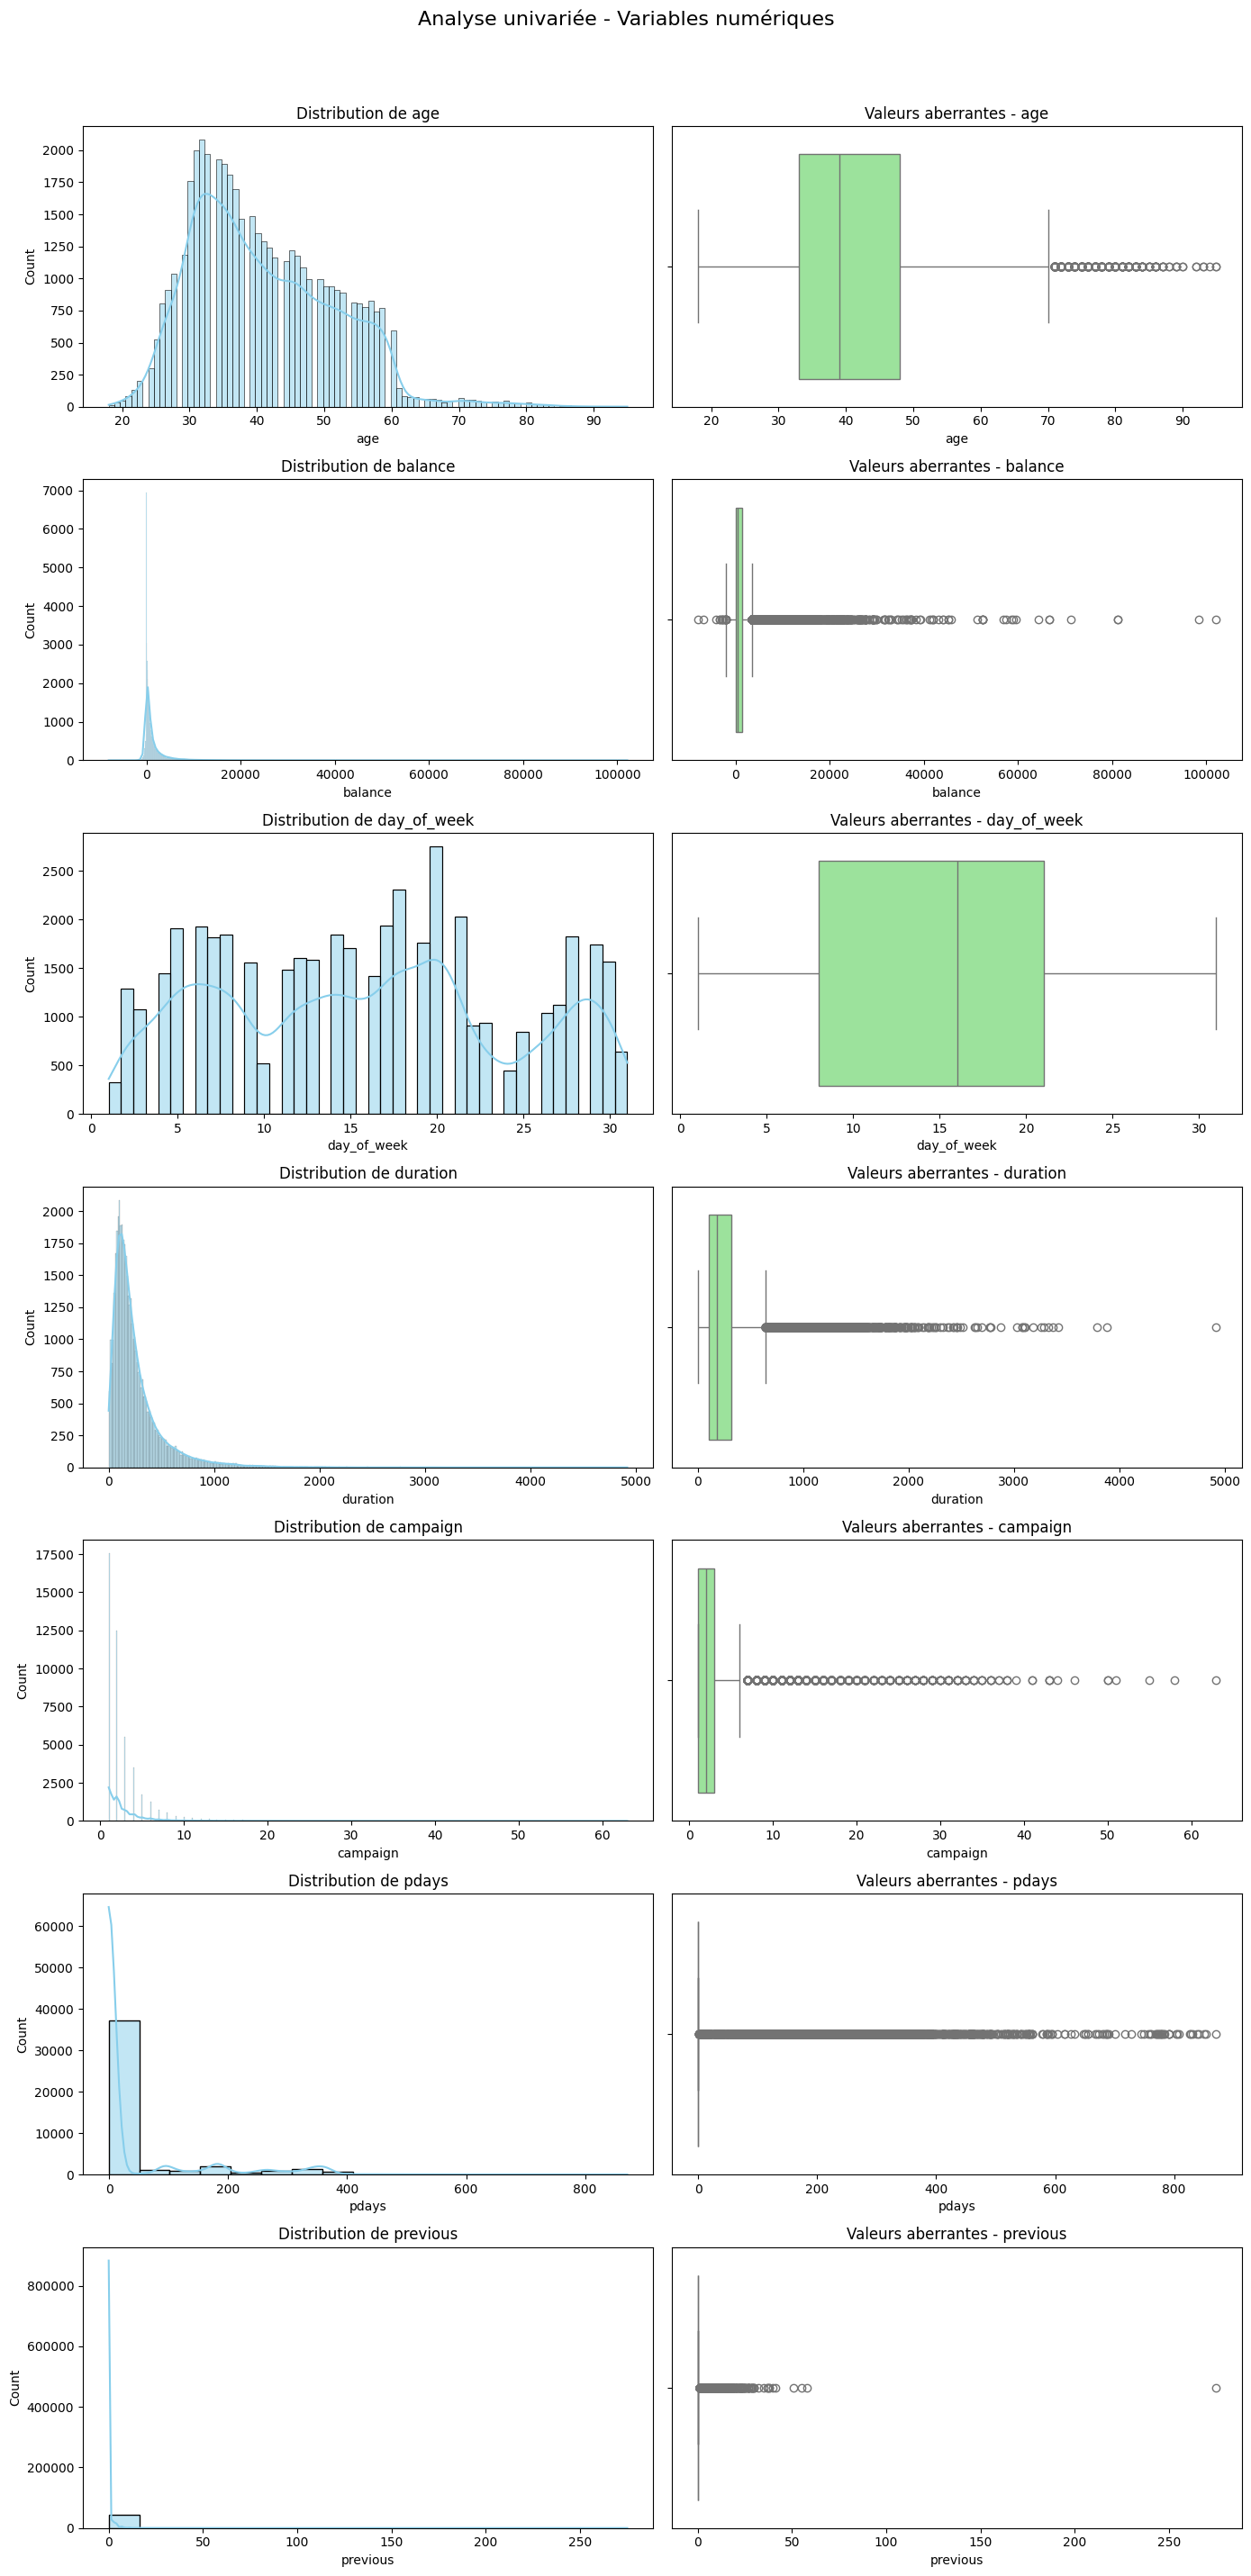

In [63]:
# 1. Variables numériques :

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Séparation des types de variables
num_cols = X_cleaned.select_dtypes(include='number').columns.tolist()
cat_cols = X_cleaned.select_dtypes(include='object').columns.tolist()

#   Histogrammes + boxplots
n = len(num_cols)
fig1, axes1 = plt.subplots(nrows=n, ncols=2, figsize=(14, 4 * n))
fig1.tight_layout(pad=5.0)
fig1.suptitle("Analyse univariée - Variables numériques", fontsize=16, y=1.02)

for i, col in enumerate(num_cols):
    # Histogramme
    sns.histplot(X_cleaned[col], kde=True, ax=axes1[i, 0], color='skyblue')
    axes1[i, 0].set_title(f"Distribution de {col}")

    # Boxplot
    sns.boxplot(x=X_cleaned[col], ax=axes1[i, 1], color='lightgreen')
    axes1[i, 1].set_title(f"Valeurs aberrantes - {col}")

plt.tight_layout()
plt.show()

##### 📊 Analyse descriptive des variables numériques

<h6>

| Variable      | Distribution observée                  | Valeurs aberrantes        | Interprétation |
|---------------|----------------------------------------|----------------------------|----------------|
| **age**       | Asymétrique droite, pic autour de 30–40 ans | Quelques outliers > 70 ans | La majorité des clients sont en âge actif. Les extrêmes sont marginaux mais à surveiller. |
| **balance**   | Fortement asymétrique droite           | De nombreux outliers, jusqu’à 100 000 € | Très forte hétérogénéité financière. Nécessite une transformation (log, winsorisation). |
| **day_of_week** | Relativement uniforme                | Aucune                     | Bonne répartition des contacts sur les jours du mois. Pas d’effet saisonnier fort visible. |
| **duration**  | Très asymétrique droite, pic <h6 200s    | Outliers nombreux > 1000s  | Variable très informative mais dépendante de l’appel. Elle influe fortement sur la probabilité de souscription. |
| **campaign**  | Très concentrée sur les faibles valeurs (1 à 3) | Outliers jusqu’à 63        | La majorité des clients ne sont contactés qu’une fois. Les relances excessives sont rares et peu efficaces. |
| **pdays**     | Valeur dominante -1 (jamais contacté)  | Extrêmes > 400             | Majorité des clients jamais recontactés. Variable utile pour distinguer les clients « neufs » vs suivis. |
| **previous**  | Concentrée sur 0–1                     | Outliers rares > 100       | Très peu de campagnes antérieures. Peut être transformée en variable binaire (contacté / non). |
</h6>


#####  Interprétation stratégique :


Les distributions fournissent une base tangible pour **justifier le ciblage** :
- Cibler les clients avec `duration` > 200s ou `poutcome_success = yes` est objectivement défendable.
- Les extrêmes de `balance` doivent être traités pour ne pas biaiser les décisions.


Les données montrent clairement que :
- Les campagnes sont plus efficaces avec **peu de relances**.
- Les contacts courts ou non qualifiés ont peu de valeur → ce sont des constats clairs pour trancher entre équipes.


Les graphiques aident à éviter les jugements subjectifs :
- Plutôt que de cibler uniquement sur l’âge ou la profession, on peut se baser sur des critères objectifs comme `duration` ou `pdays`.

Les asymétries identifiées permettent :
- De transformer les variables pour **renforcer la qualité des modèles prédictifs**,
- De créer des scores de propension plus efficaces.


L’analyse met en lumière des **profils extrêmes ou spécifiques** :
- Par exemple, des clients très sollicités ou très aisés nécessitent **un traitement différencié** (offres, messages, canal).

#####  Recommandations pratiques

1. Transformer `balance`, `duration`, `campaign`, `pdays` pour atténuer les effets des outliers.
3. Isoler et traiter les valeurs extrêmes.
---



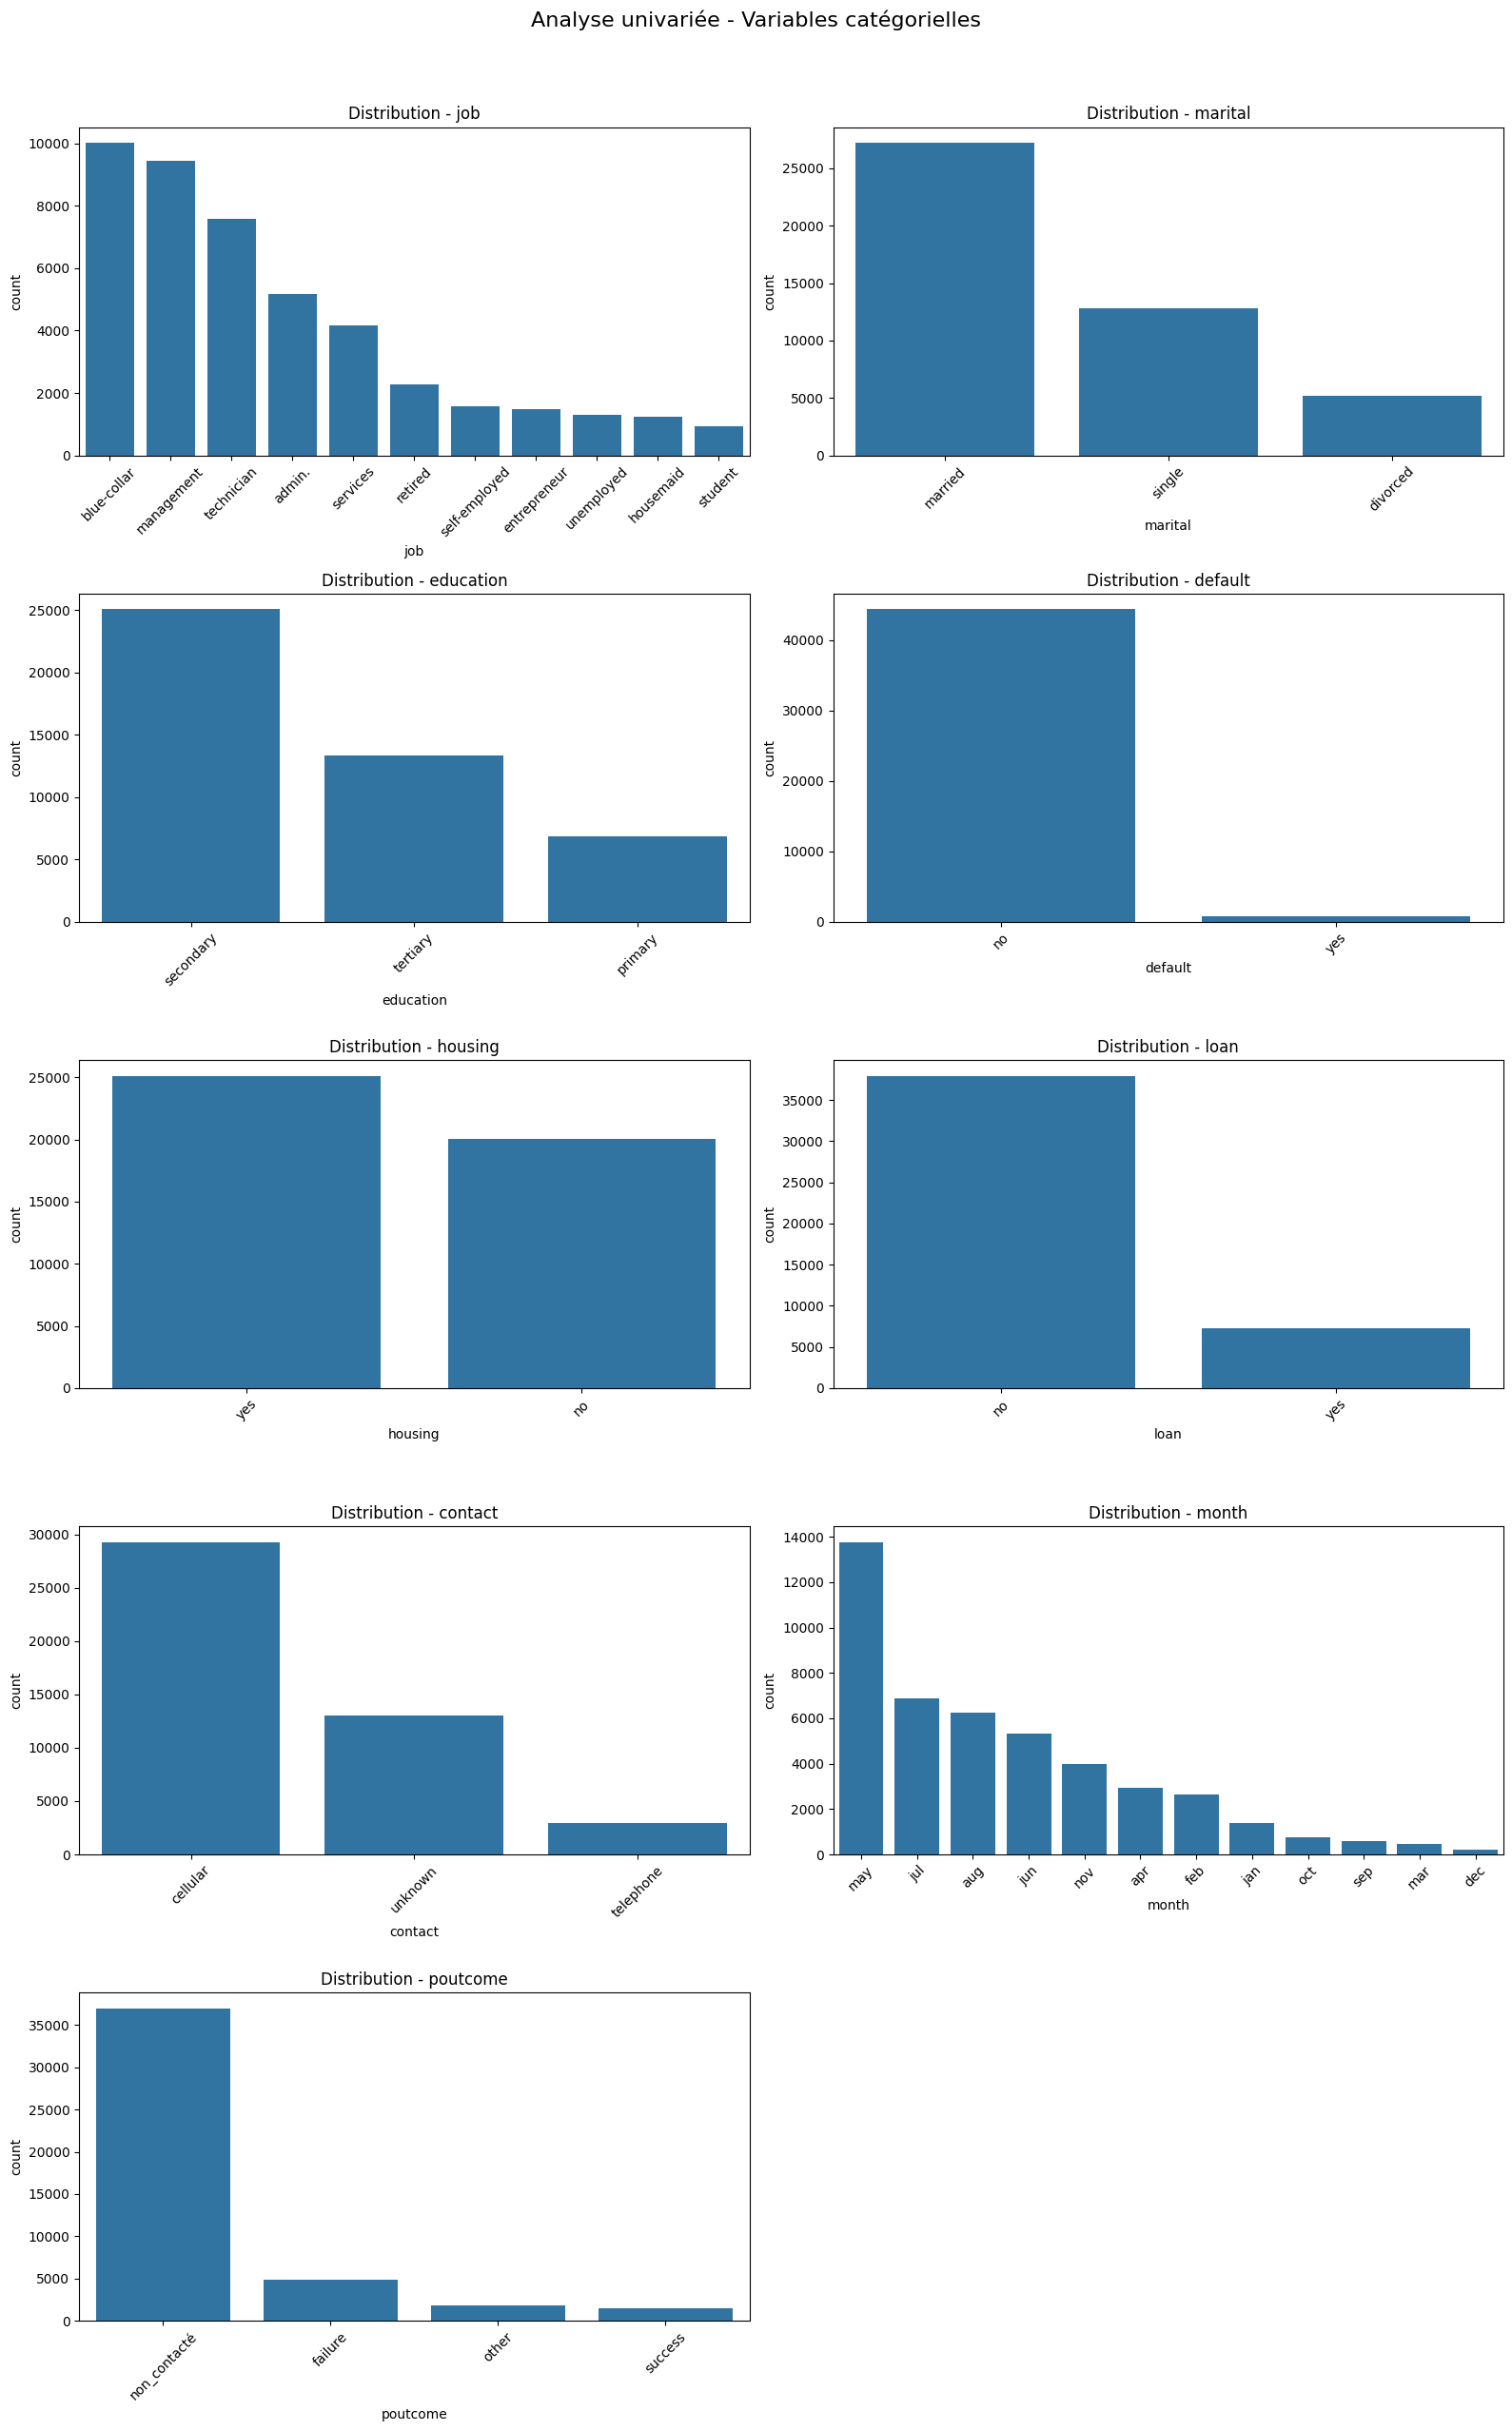

In [64]:
#  2. Variables catégorielles : countplot
n_cat = len(cat_cols)
n_cols = 2
n_rows = math.ceil(n_cat / n_cols)
fig2, axes2 = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 5 * n_rows))
fig2.tight_layout(pad=5.0)
fig2.suptitle("Analyse univariée - Variables catégorielles", fontsize=16, y=1.02)

axes2 = axes2.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=X_cleaned, x=col, ax=axes2[i], order=X_cleaned[col].value_counts().index)
    axes2[i].set_title(f"Distribution - {col}")
    axes2[i].tick_params(axis='x', rotation=45)

# Masquer les sous-graphes vides
for j in range(i + 1, len(axes2)):
    fig2.delaxes(axes2[j])

plt.tight_layout()
plt.show()

####  Analyse descriptive des variables catégorielles

<h6>

| Variable     | Observation principale | Interprétation stratégique |
|--------------|-------------------------|-----------------------------|
| **job**      | `blue-collar`, `management`, `technician` dominent | Ces métiers représentent les **cœurs de clientèle**. Les groupes très minoritaires (`student`, `housemaid`, `entrepreneur`) peuvent être traités différemment dans le ciblage. |
| **marital**  | `married` majoritaire | Les **clients mariés** sont probablement plus stables mais aussi potentiellement plus prudents. |
| **education**| `secondary` est largement dominant | La majorité a un niveau secondaire. Cela peut refléter une clientèle intermédiaire en pouvoir d’achat. |
| **default**  | Presque tous les clients n'ont pas de défaut (`no`) | Indique une population **globalement solvable**, rassurante pour les offres d’épargne. |
| **housing**  | Répartition assez équilibrée (`yes` vs `no`) | Un prêt immobilier n'empêche pas de souscrire à un placement, mais peut influencer la capacité d’investissement. |
| **loan**     | Majorité sans prêt personnel (`no`) | Les clients sans prêt sont **potentiellement plus disposés** à investir dans un dépôt à terme. |
| **contact**  | `cellular` très dominant | Canal de contact à **optimiser en priorité**. Les campagnes doivent privilégier les appels mobiles. |
| **month**    | Très forte concentration en `may` | Le mois de mai est **trop sollicité** → risque de saturation. À compenser par un meilleur équilibre saisonnier. |
| **poutcome** | `non_contacté` très majoritaire | Montre que la **plupart des clients n’ont jamais eu de contact réussi**, ce qui laisse un **grand potentiel d’exploration**. |
</h6>


- Utiliser `job`, `education`, `loan` pour construire des **profils prioritaires**.

- Prioriser le canal `cellular`.
- Éviter d’investir sur les contacts avec `unknown`.

- Réorienter les campagnes vers des mois comme mars, septembre, octobre.

- La masse de clients `non_contacté` est une **opportunité commerciale importante**.
- Stratégies à développer pour les premiers contacts (message, offre, timing).


##### Recommandations

1. Cibler selon le triptyque `job`, `loan`, `contact` pour améliorer le taux de conversion.
2. Équilibrer la charge des campagnes sur l’année (éviter la surcharge en mai).
3. Prioriser les **contacts neufs**.
4. Affiner le message marketing selon les catégories `education` et `marital` pour **plus de pertinence**.

---

#### Variables clés pour guider le ciblage client

<h6>

| Variable         | Pourquoi elle est utile | Comment elle oriente la décision |
|------------------|-------------------------|----------------------------------|
| `duration`       | Corrélée fortement à la souscription (`+0.39`) | Identifie les clients les plus engagés après appel. |
| `poutcome`       | Historique de campagnes | Les anciens succès sont de bons candidats pour re-sollicitation. |
| `contact`        | Type de canal (mobile, téléphone, inconnu) | Mieux cibler les canaux efficaces (mobile > téléphone). |
| `month`          | Mois de l'appel | Identifier les périodes les plus propices à la conversion. |
| `campaign`       | Nombre de contacts | Limiter le nombre de relances pour éviter l'effet "harcèlement". |
| `pdays`          | Temps écoulé depuis dernier contact | Permet de distinguer prospects récents et anciens. |
| `job`            | Profil socio-pro | Certains métiers sont plus réceptifs à ce type d'offre. |
| `balance`        | Solde annuel moyen | Peut refléter la capacité de souscription à un dépôt à terme. |
</h6>

##### Pourquoi `duration` est la variable la plus utile

-  **Corrélation la plus élevée avec la variable cible `y`** : ≈ **+0.39**
-  **Indicateur direct d’intérêt** : plus un client reste en ligne, plus il est **susceptible de souscrire**.
-  **Discriminant fort** : les souscriptions sont quasi absentes en cas de durée très courte.
-  **Exploitable opérationnellement** : permet d’agir en **temps réel** ou de relancer **après un appel prometteur**.
-  **Interprétable et actionnable** : facile à expliquer aux équipes commerciales.

**# Describe `duration` :**
<h6>
Permet de résumer statistiquement la distribution de cette variable, en fournissant des mesures clés qui aident à comprendre comment les durées d’appels se répartissent dans l’ensemble des données.
</h6>

In [65]:
import pandas as pd


# Extraire les statistiques descriptives
duration_stats = X_cleaned['duration'].describe()

# Transformer en DataFrame pour un affichage plus clair
duration_df = pd.DataFrame(duration_stats).T
duration_df.index = ['duration']  # Nom de ligne explicite

# Affichage
print(" Statistiques descriptives de 'duration' :")
display(duration_df)

 Statistiques descriptives de 'duration' :


,count,mean,std,min,25%,50%,75%,max
duration,45211.0,258.16308,257.527812,0.0,103.0,180.0,319.0,4918.0


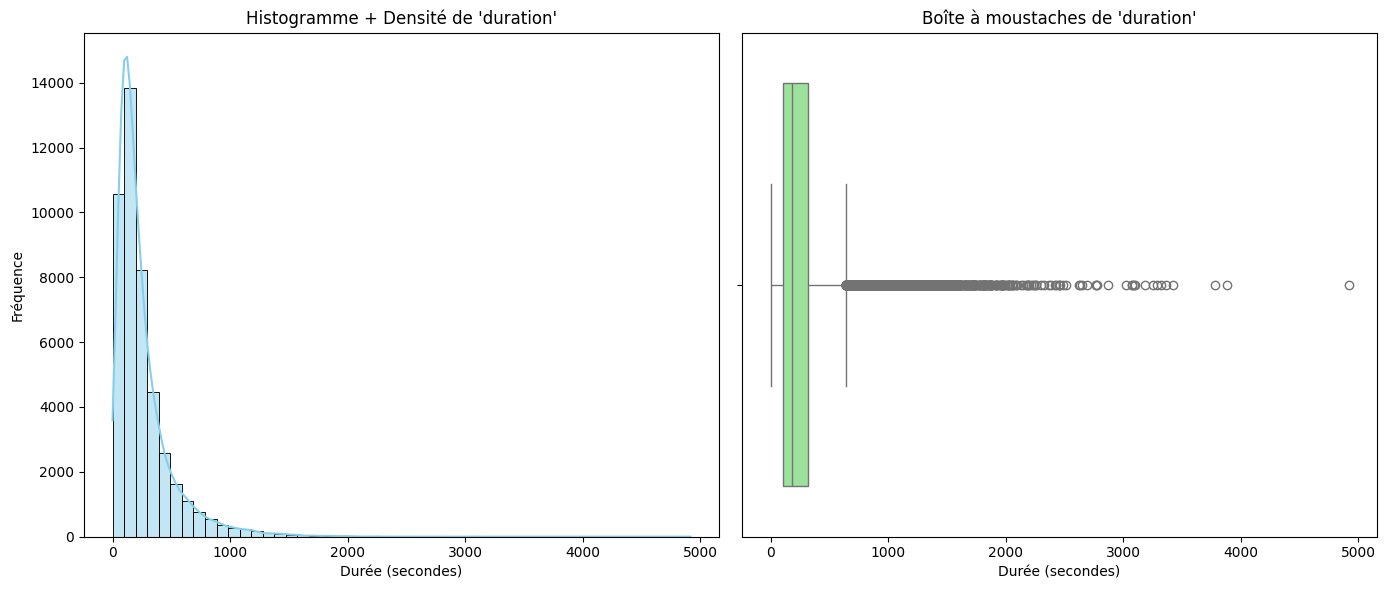

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage
plt.figure(figsize=(14, 6))

# 1. Histogramme avec courbe de densité
plt.subplot(1, 2, 1)
sns.histplot(X_cleaned['duration'], kde=True, bins=50, color='skyblue')
plt.title("Histogramme + Densité de 'duration'")
plt.xlabel("Durée (secondes)")
plt.ylabel("Fréquence")

# 2. Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=X_cleaned['duration'], color='lightgreen')
plt.title("Boîte à moustaches de 'duration'")
plt.xlabel("Durée (secondes)")

plt.tight_layout()
plt.show()

#####  Statistiques descriptives de la variable `duration`

<h6>

| Statistique | Valeur       | Interprétation |
|-------------|--------------|----------------|
| **count**   | 45,211       | Nombre total d’appels analysés. |
| **mean**    | 258.16 sec   | Durée moyenne d’un appel ≈ **4 min 18 sec**. |
| **std**     | 257.53 sec   | Écart-type élevé → grande **variabilité** des durées. |
| **min**     | 0.0 sec      | Appels très courts ou échoués (peut refléter désintérêt). |
| **25%**     | 103 sec      | 25 % des appels durent **moins de 1 min 43 sec**. |
| **50%**     | 180 sec      | Médiane : **50 % durent moins de 3 minutes**. |
| **75%**     | 319 sec      | 25 % des appels durent **plus de 5 min 19 sec**. |
| **max**     | 4918 sec     | Outlier : appel de plus de **81 minutes**. |
</h6>



#####  Points à surveiller
- **Grande dispersion** → nécessite normalisation ou transformation (ex : log).
- **Outliers très élevés** peuvent biaiser (modèles).

---

**# Coefficient de variation**

<h6>Permet de mesurer les valeurs qui sont dispersées autour de la moyenne.</h6>

In [67]:
# Écart-type 
std_duration = X_cleaned['duration'].std()

# Amplitude (max - min)
range_duration = X_cleaned['duration'].max() - X_cleaned['duration'].min()

# Coefficient de variation (CV = std / mean)
mean_duration = X_cleaned['duration'].mean()
cv_duration = std_duration / mean_duration

# Affichage des résultats
print(" Analyse de la dispersion de 'duration' :")
print(f"Écart-type       : {std_duration:.2f} sec")
print(f"Amplitude        : {range_duration:.2f} sec (max - min)")
print(f"Coefficient de variation : {cv_duration:.2%} (std / mean)")

 Analyse de la dispersion de 'duration' :
Écart-type       : 257.53 sec
Amplitude        : 4918.00 sec (max - min)
Coefficient de variation : 99.75% (std / mean)



#####  Analyse de la dispersion et coefficient de variation de `duration`

<h6>

- **Écart-type** : 257.53 sec  
- **Amplitude** : 4918 sec (entre la durée minimale et maximale)
- **Coefficient de variation (CV)** : **99.75 %**

</h6>

#####  Interprétation

<h6>

- **Le coefficient de variation est supérieur à 50 %**, ce qui indique une **très forte dispersion** des valeurs autour de la moyenne.
- En d'autres termes, la variable `duration` est **très hétérogène** :
  - Certains clients passent des appels **très courts (0–60 sec)**,
  - Tandis que d'autres peuvent être en ligne pendant **plusieurs minutes, voire heures**.
</h6>

---

**#La méthode .skew()**

<h6>.skew() mesure l’asymétrie de la distribution d’une variable quantitative.</h6>

In [68]:
# Calcul de l'asymétrie (skewness) de la variable 'duration'
skew_duration = X_cleaned['duration'].skew()

# Affichage
print(f"Asymétrie (skew) de 'duration' : {skew_duration:.2f}")

Asymétrie (skew) de 'duration' : 3.14


#####  Interprétation de l’asymétrie (`skew`) de `duration`


| Valeur de `skew` | Interprétation |
|------------------|----------------|
| ≈ 0              | Distribution **symétrique** (courbe en cloche) |
| > 0              | **Asymétrie à droite** (valeurs extrêmes hautes) ✅ |
| < 0              | **Asymétrie à gauche** (valeurs extrêmes basses) |

- La valeur de **3.14** est **nettement positive**.
- Cela indique que la **distribution de `duration` est fortement asymétrique à droite**.

- La majorité des appels ont une **durée courte**, concentrée à gauche de la distribution.
- Une **petite proportion d'appels dure très longtemps** (plusieurs centaines voire milliers de secondes), créant une **queue étirée vers la droite**.
- Cela confirme la présence de **valeurs extrêmes élevées** (outliers).

---


**# Courbe de densité de probabilité**

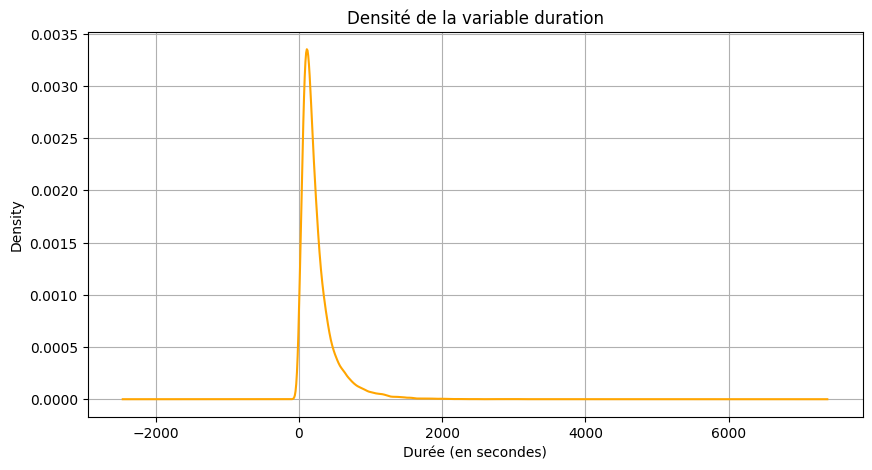

In [69]:
import matplotlib.pyplot as plt

# Courbe de densité
X_cleaned['duration'].plot(kind='density', figsize=(10, 5), color='orange', title='Densité de la variable duration')

# Axe des abscisses
plt.xlabel("Durée (en secondes)")
plt.grid(True)
plt.show()

La **distribution de `duration` est fortement asymétrique à droite**.

---

**# Calcule de la moyenne (ou la valeur moyenne)**

In [70]:
# Calcul de la moyenne
mean_duration = X_cleaned['duration'].mean()

# Affichage
print(f"Moyenne (valeur moyenne) de 'duration' : {mean_duration:.2f} secondes")

Moyenne (valeur moyenne) de 'duration' : 258.16 secondes


- **Moyenne de `duration`** : **258.16 secondes**  
   En moyenne, les appels durent environ **4 minutes et 18 secondes**.

----

**# L'expression len(duration) : renvoie la taille ou le nombre d'éléments**

In [71]:
# Nombre d'observations dans la colonne 'duration'
nb_elements = len(X_cleaned['duration'])

# Affichage
print(f"Nombre total de valeurs dans 'duration' : {nb_elements}")

Nombre total de valeurs dans 'duration' : 45211


- **Nombre total de valeurs** : **45,211 clients**  
   Cela confirme que l’analyse est effectuée sur **l’ensemble de la base client** sans valeurs manquantes.

---

**# Kurtosis :**

In [72]:
from scipy.stats import kurtosis

# Calcul de la kurtosis
kurt_duration = kurtosis(X_cleaned['duration'])

# Affichage du résultat
print(f"Kurtosis de 'duration' : {kurt_duration:.2f}")

Kurtosis de 'duration' : 18.15


#####  Interprétation de la kurtosis de `duration`

| Kurtosis         | Interprétation |
|------------------|----------------|
| ≈ 0              | Distribution normale (courbe en cloche "standard") |
| > 0              | **Distribution pointue** (leptokurtique) |
| < 0              | Distribution aplatie (platykurtique) |


- Une **kurtosis de 18.15** est **très largement supérieure à 0**.
- Cela signifie que la distribution de `duration` est **fortement leptokurtique**.


- La plupart des appels ont des durées proches de la moyenne (**forte concentration centrale**).
- Mais il existe aussi **beaucoup d’outliers extrêmes** (appels très longs).
- Cela confirme ce que montraient déjà :
  - L’écart-type élevé
  - L’asymétrie (skew = 3.14)

---

**# Un boxplot** 
<h6>
Permet de résumer rapidement la tendance centrale, visualiser la dispersion et identifier les valeurs extrêmes.
</h6>

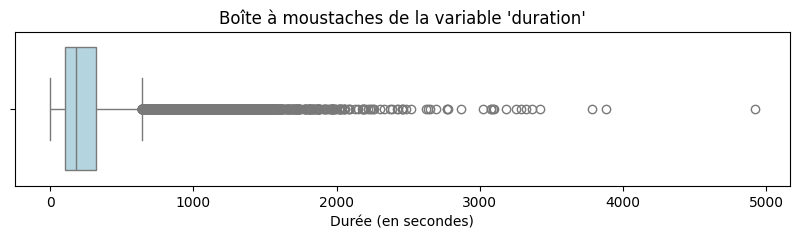

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=X_cleaned['duration'], color='lightblue')

# Titre et étiquettes
plt.title("Boîte à moustaches de la variable 'duration'")
plt.xlabel("Durée (en secondes)")


plt.show()

#####  Ce qu'on observe du boxplot de `duration`

#####  La boîte (entre Q1 et Q3)
- La **boîte représente les 50 % centraux** des durées d’appel.
- Elle est située dans une plage **basse** : environ entre **100 et 320 secondes**.
- Cela montre que **la majorité des appels sont assez courts**, souvent inférieurs à 5 minutes.

#####  La médiane
- La **médiane** (ligne verticale dans la boîte) est **décalée vers la gauche**.
- Cela indique une **asymétrie à droite** (skew positive), confirmée numériquement (`skew = 3.14`).

#####  Les valeurs aberrantes (outliers)
- De nombreux **points en dehors des moustaches** sont visibles à droite du graphique.
- Ces **outliers représentent des appels exceptionnellement longs**, parfois **supérieurs à 1000 voire 4000 secondes**.
- Bien que rares, ils **étirent la distribution** et peuvent **fausser la moyenne**.

---

Analyse univariée de duration

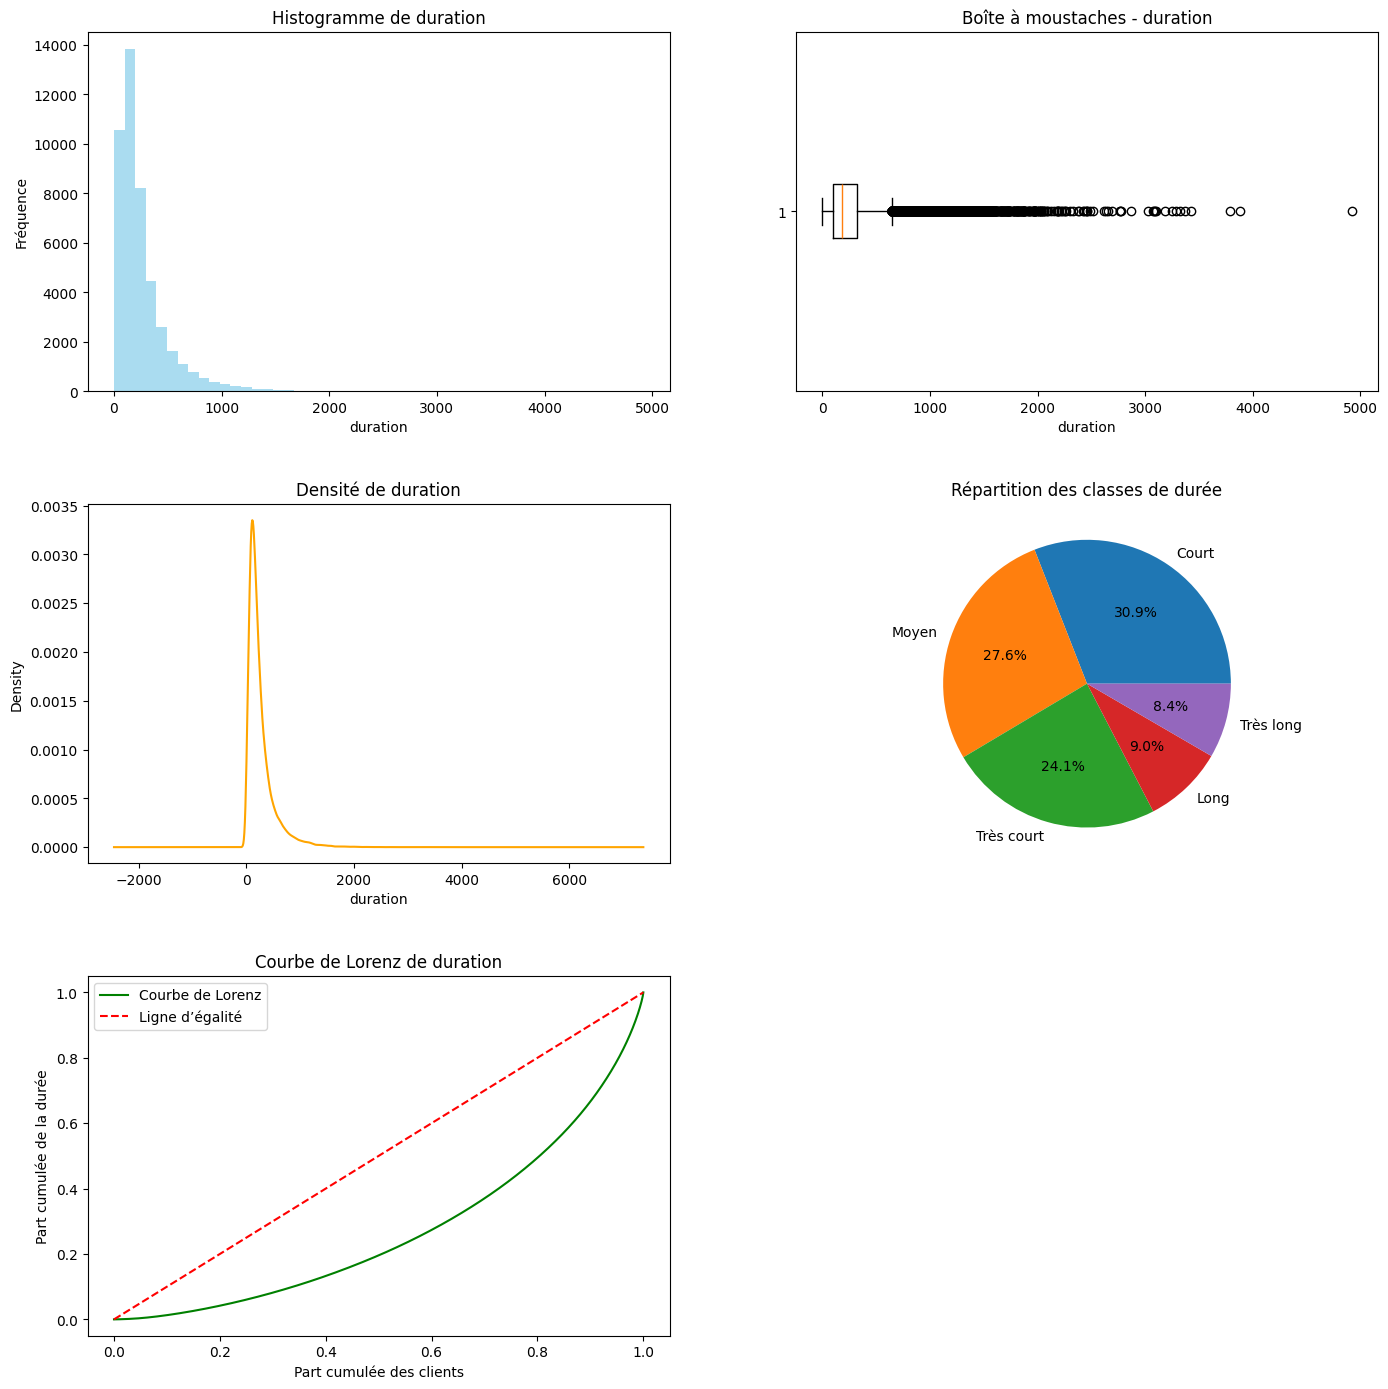

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copie des données
data = X_cleaned.copy()
var = 'duration'

# Création de classes de durée
labels = ['Très court', 'Court', 'Moyen', 'Long', 'Très long']
bins = [0, 100, 200, 400, 600, data[var].max() + 1]
data['duration_cat'] = pd.cut(data[var], bins=bins, labels=labels)
duration_counts = data['duration_cat'].value_counts().sort_values(ascending=False)

# Courbe de Lorenz
sorted_vals = np.sort(data[var])
cumulative_vals = np.cumsum(sorted_vals) / sorted_vals.sum()
lorenz_x = np.linspace(0, 1, len(cumulative_vals))

# Subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout(pad=6.0)

# 1. Histogramme
axes[0, 0].hist(data[var], bins=50, color='skyblue', alpha=0.7)
axes[0, 0].set_title(f"Histogramme de {var}")
axes[0, 0].set_xlabel(var)
axes[0, 0].set_ylabel("Fréquence")

# 2. Boîte à moustaches
axes[0, 1].boxplot(data[var], vert=False)
axes[0, 1].set_title(f"Boîte à moustaches - {var}")
axes[0, 1].set_xlabel(var)

# 3. Densité
data[var].plot(kind='density', ax=axes[1, 0], title=f"Densité de {var}", color='orange')
axes[1, 0].set_xlabel(var)

# 4. Camembert
axes[1, 1].pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
axes[1, 1].set_title("Répartition des classes de durée")

# 5. Courbe de Lorenz
axes[2, 0].plot(lorenz_x, cumulative_vals, label="Courbe de Lorenz", color="green")
axes[2, 0].plot([0, 1], [0, 1], linestyle="--", color="red", label="Ligne d’égalité")
axes[2, 0].set_title(f"Courbe de Lorenz de {var}")
axes[2, 0].set_xlabel("Part cumulée des clients")
axes[2, 0].set_ylabel("Part cumulée de la durée")
axes[2, 0].legend()

# 6. Emplacement vide
axes[2, 1].axis('off')

plt.show()

<div style="font-size:14px">

<h3> Analyse univariée – Variable <code>duration</code></h3>

<h4>1. Histogramme</h4>
<ul>
  <li>La distribution est <strong>très asymétrique à droite</strong>.</li>
  <li>La majorité des appels durent <strong>moins de 500 secondes</strong>.</li>
  <li>Forte concentration de valeurs faibles, avec une longue traîne vers les appels plus longs.</li>
</ul>

<h4>2. Boîte à moustaches</h4>
<ul>
  <li>La <strong>médiane</strong> est très basse, près du bas de la boîte.</li>
  <li>Présence de <strong>nombreux outliers</strong> à droite.</li>
  <li>Les appels longs sont rares mais fortement éloignés de la moyenne → forte variabilité.</li>
</ul>

<h4>3. Courbe de densité</h4>
<ul>
  <li>La densité est <strong>fortement concentrée autour de petites valeurs</strong>.</li>
  <li>Chute rapide après le pic → confirme la rareté des appels longs.</li>
  <li>La courbe est typique d'une variable <strong>très asymétrique et non normale</strong>.</li>
</ul>

<h4>4. Camembert des classes de durée</h4>
<ul>
  <li>Les classes dominantes sont <strong>"Court" (30.9%)</strong> et <strong>"Moyen" (27.6%)</strong>.</li>
  <li>Très peu d'appels sont classés <strong>"Long" (9.0%)</strong> ou <strong>"Très long" (8.4%)</strong>.</li>
  <li>Répartition déséquilibrée en faveur des appels courts.</li>
</ul>

<h4>5. Courbe de Lorenz</h4>
<ul>
  <li>La courbe est <strong>loin de la diagonale</strong>, ce qui traduit une <strong>forte concentration des durées</strong> sur une petite proportion de clients.</li>
  <li>Cela indique une <strong>inégalité importante</strong> : peu de clients cumulent une grande partie du temps d’appel total.</li>
</ul>

<h4> Interprétation générale</h4>
<ul>
  <li>La variable <code>duration</code> est <strong>extrêmement asymétrique</strong>, avec de nombreux <strong>outliers</strong>.</li>
  <li>C’est une variable <strong>très informative</strong> pour la modélisation, mais elle nécessite :</li>
  <ul>
    <li>Une <strong>transformation logarithmique
  </ul>
  <li>Sa <strong>forme actuelle nuit à une modélisation directe</strong> sans traitement préalable.</li>
</ul>

</div>


 <div style="display: flex; background-color: #2E2F8F;" >
<h4 style="margin: auto; padding: 15px; ">Analyse bivariée
</h4>

</div>
<p>
Identification des facteurs qui influencent significativement la souscription (y) pour guider le modèle de prédiction et les recommandations marketing.</p>


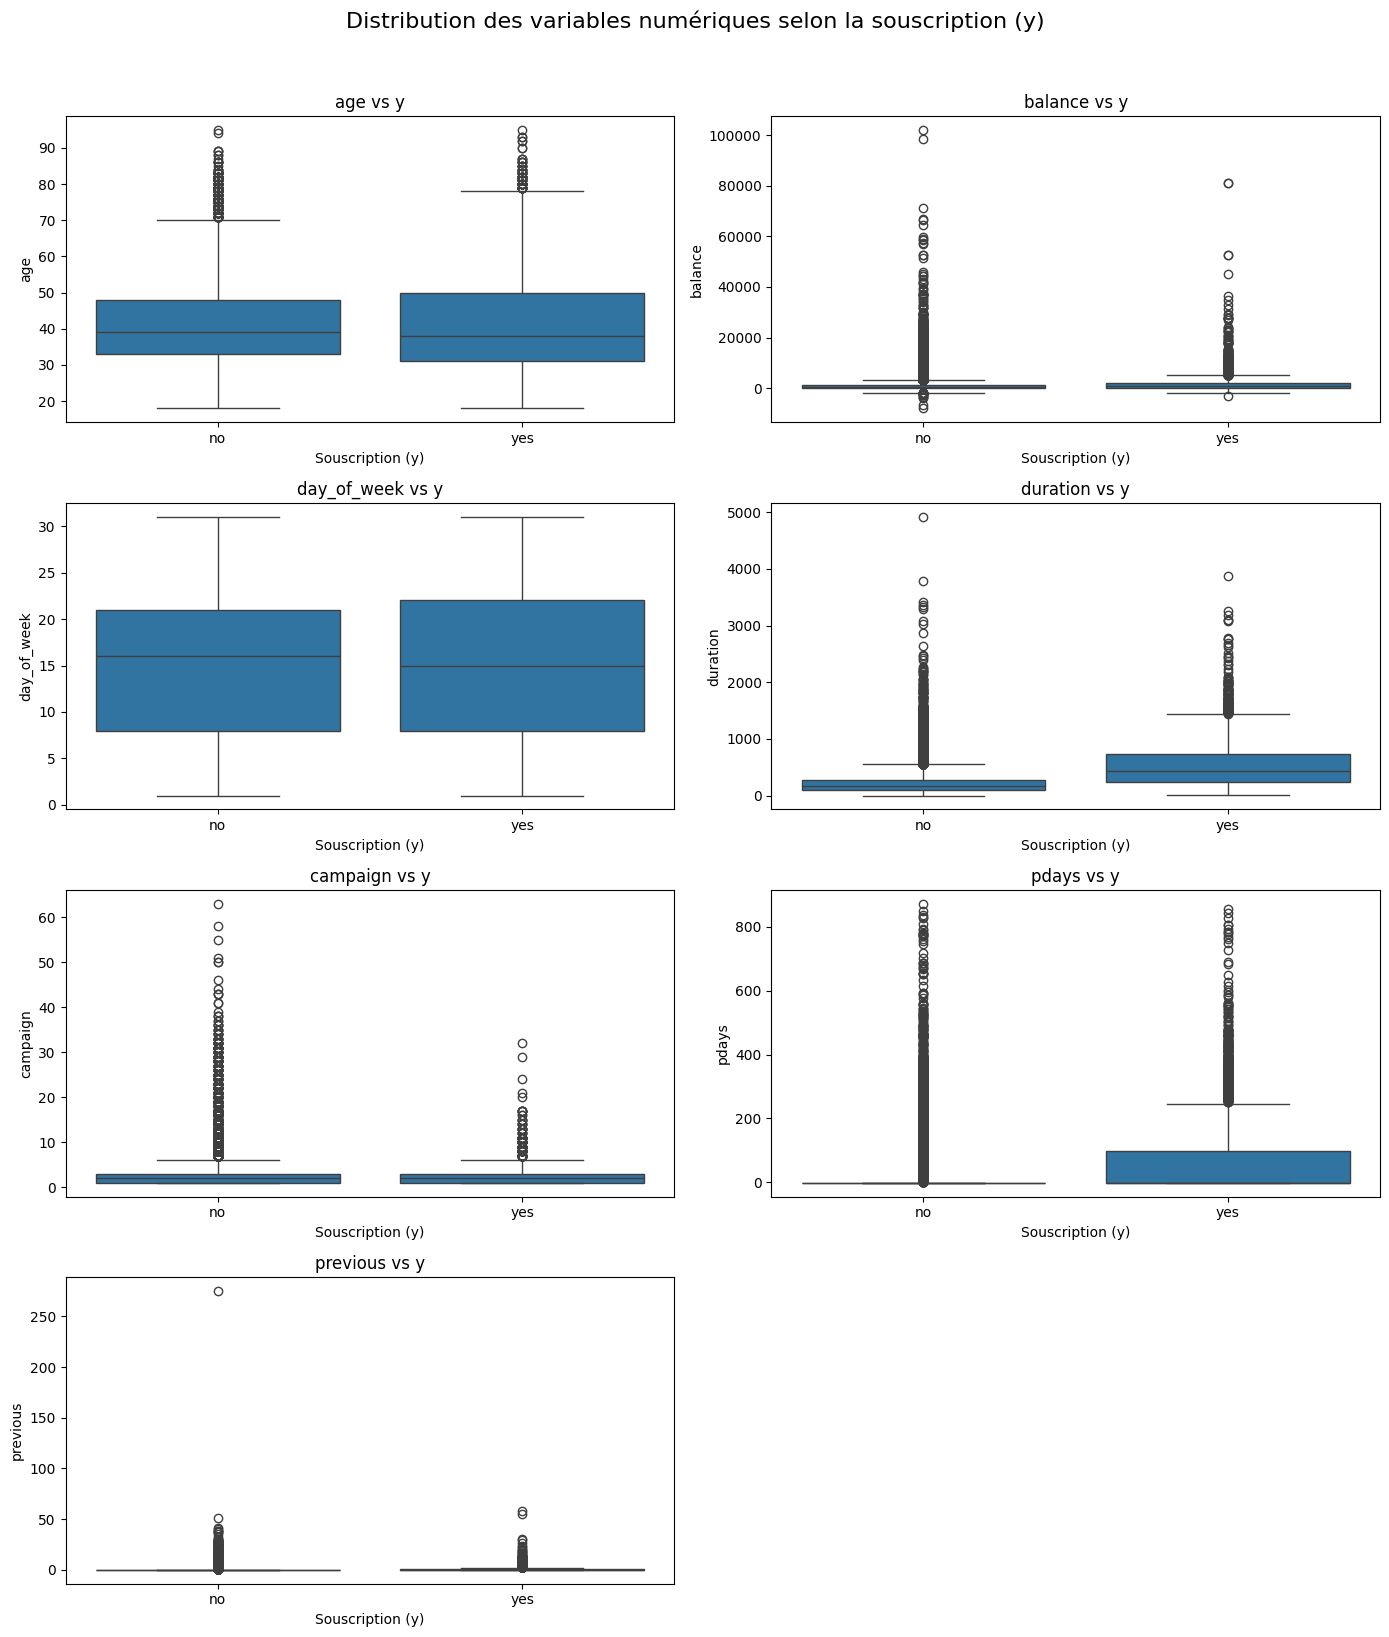

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Fusionner X_cleaned et y_cleaned
df_bi = X_cleaned.copy()
df_bi['y'] = y_cleaned['y']

# Liste des variables numériques
num_cols = X_cleaned.select_dtypes(include='number').columns.tolist()

# Préparer les subplots
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
fig.suptitle("Distribution des variables numériques selon la souscription (y)", fontsize=16, y=1.02)
axes = axes.flatten()

# Générer tous les boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x='y', y=col, data=df_bi, ax=axes[i])
    axes[i].set_title(f"{col} vs y")
    axes[i].set_xlabel("Souscription (y)")
    axes[i].set_ylabel(col)

# Supprimer les axes inutilisés s'il y a un nombre impair de variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Analyse  Variables numériques vs `y` (souscription)

<h6>

| Variable      | Observation visuelle | Interprétation stratégique |
|---------------|-----------------------|-----------------------------|
| **age**       | Légère différence, médiane un peu plus haute pour `yes` | Les clients plus âgés semblent **légèrement plus enclins à souscrire**, mais la différence reste faible. |
| **balance**   | Médiane plus élevée pour `yes`, grande variabilité | Un **solde bancaire plus élevé** est associé à une probabilité plus forte de souscription, bien que la variabilité soit importante. |
| **day_of_week** | Distributions quasi identiques | Le **jour du mois** n’a **aucun impact significatif** sur la décision de souscription. |
| **duration**  | Médiane nettement plus élevée pour `yes` | C’est la variable **la plus discriminante** : plus l’appel est long, plus la probabilité de souscription augmente. |
| **campaign**  | Médiane plus basse pour `yes` | Les clients qui souscrivent sont **moins sollicités** → effet d’**usure** avec trop de relances. |
| **pdays**     | Moyenne et médiane plus basses pour `no` | Les clients **recontactés rapidement** sont plus enclins à souscrire. |
| **previous**  | Légère élévation chez `yes` | Un **historique de contacts précédents** augmente légèrement les chances de conversion. |
</h6>


#####  Variables les plus utiles pour prédire `y`
1. `duration` → très bon discriminant entre `yes` et `no`
2. `balance` → lien direct avec la capacité d’épargne
3. `campaign` → trop de sollicitations nuisent à la conversion
4. `pdays` et `previous` → mesurent l’efficacité du suivi marketing

#####  Variables peu utiles
- `day_of_week` → **aucun pouvoir prédictif visible**

##### Recommandations

- **Inclure** : `duration`, `balance`, `campaign`, `pdays`, `previous` dans les modèles prédictifs.
- **Exclure ou déprioriser** : `day_of_week`.
- **Prétraiter `duration`** (log, binning) pour réduire l’effet des outliers.
- **Segmenter les clients** selon la durée d’appel et leur historique de contact pour mieux cibler les campagnes.

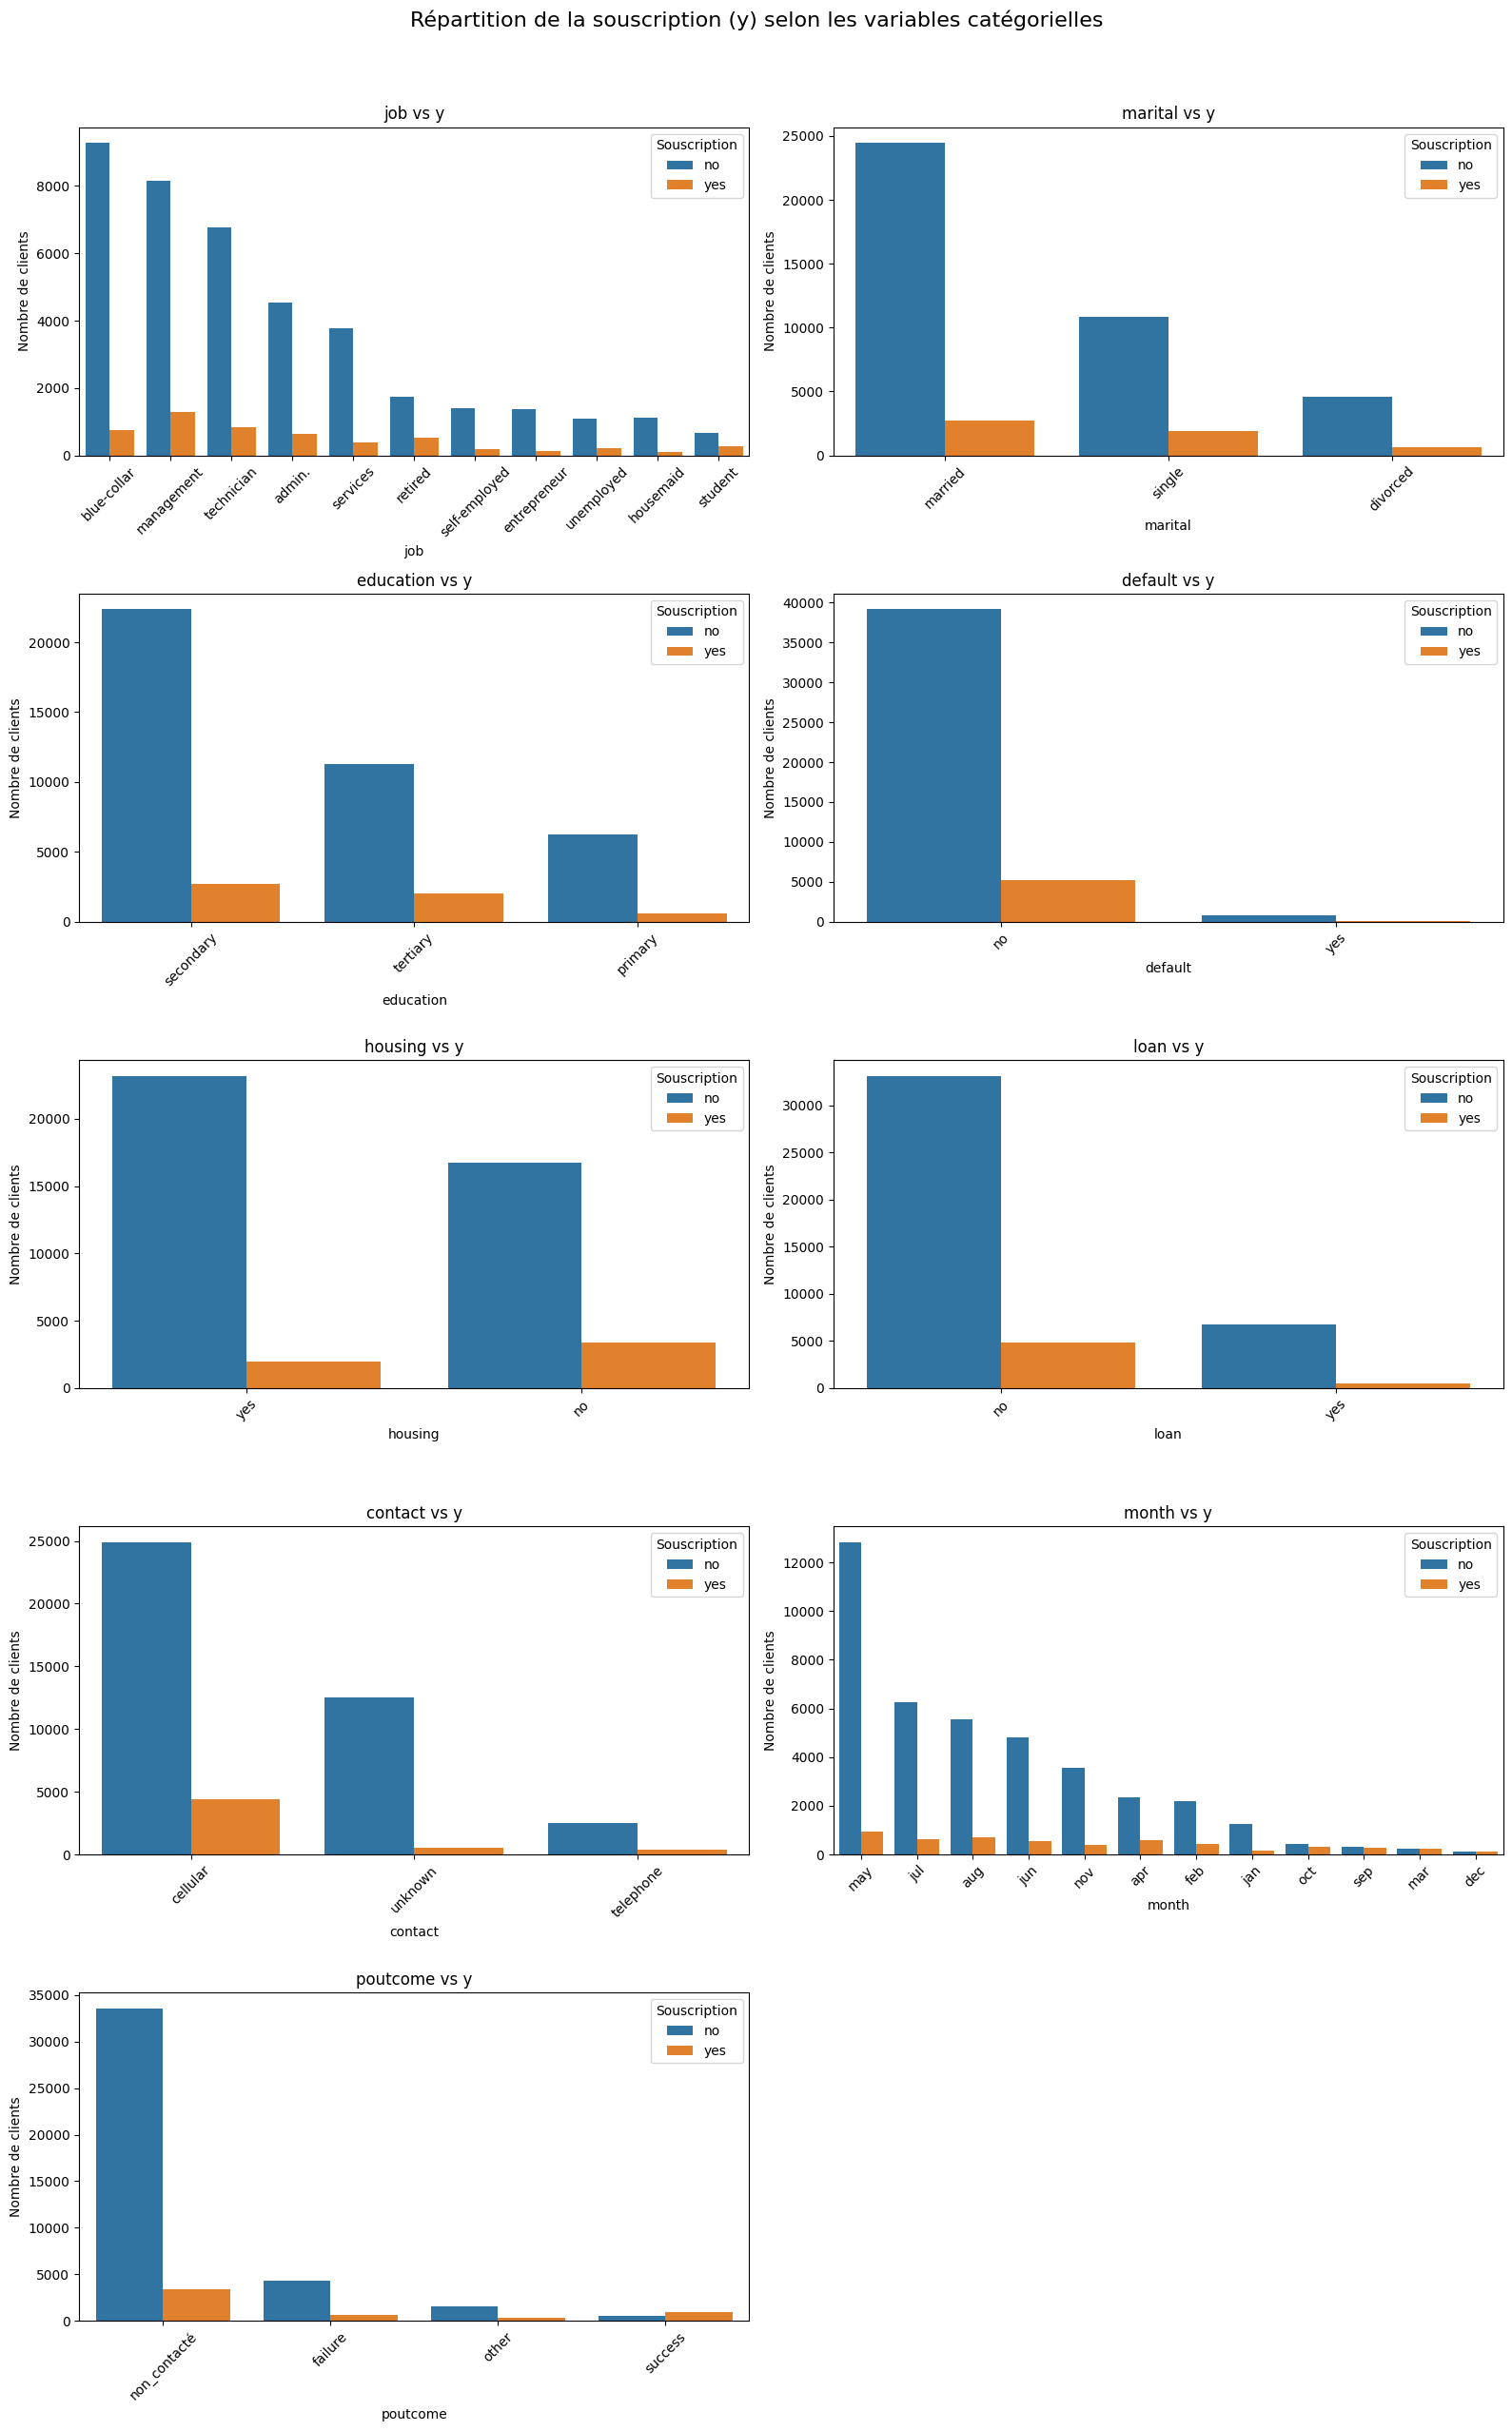

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Liste des variables catégorielles
cat_cols = X_cleaned.select_dtypes(include='object').columns.tolist()

# Nombre de colonnes de graphiques par ligne
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

# Création des subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
fig.suptitle("Répartition de la souscription (y) selon les variables catégorielles", fontsize=16, y=1.02)
axes = axes.flatten()

# Génération des countplots
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='y', data=df_bi, ax=axes[i], order=X_cleaned[col].value_counts().index)
    axes[i].set_title(f"{col} vs y")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Nombre de clients")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="Souscription")

# Suppression des sous-graphiques vides s’il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Analyse  Variables catégorielles vs `y` (souscription)

<h6>

| Variable      | Observation visuelle | Interprétation stratégique |
|---------------|----------------------|-----------------------------|
| **job**       | Les taux de souscription varient selon les métiers. `retired`, `student`, `management` ont une proportion plus élevée de `yes`. | Ces segments sont à **cibler en priorité**. Les `blue-collar` ont un taux de conversion faible → moins réactifs. |
| **marital**   | Tous les statuts ont plus de `no` que `yes`. Légère hausse de `yes` chez les `single`. | Le **statut marital** n'est pas très discriminant, mais les célibataires semblent **légèrement plus ouverts** à l’offre. |
| **education** | Les niveaux `tertiary` et `secondary` génèrent plus de souscriptions que `primary`. | Un **niveau d’éducation plus élevé** est associé à un taux de souscription supérieur. |
| **default**   | Très peu de clients avec `default = yes` souscrivent. | Un historique de **défaut est un frein majeur** → à filtrer ou exclure. |
| **housing**   | Les clients sans prêt immobilier (`no`) ont plus de souscriptions que ceux avec (`yes`). | Avoir un prêt immobilier pourrait **réduire la capacité d’épargne**. |
| **loan**      | Les clients sans prêt personnel (`no`) souscrivent davantage. | Un prêt personnel en cours est un **frein à la souscription**. |
| **contact**   | `cellular` domine en volume et en conversions. `telephone` et `unknown` génèrent peu de `yes`. | Le **canal de contact est crucial** : il faut privilégier le **mobile (cellular)**. |
| **month**     | `may` a le plus grand nombre de clients contactés mais très peu de `yes`. `mar`, `oct`, `dec` ont de meilleurs taux. | Le **mois de contact** a un **fort impact**. Éviter `may`, cibler des mois plus favorables. |
| **poutcome**  | `success` est fortement corrélé à des souscriptions. `non_contacted` est très majoritaire mais génère peu de `yes`. | L’historique de campagne est **hautement prédictif**. Les clients ayant déjà souscrit sont **à recontacter en priorité**.
</h6>

#####  Variables catégorielles les plus discriminantes :
- `poutcome` : succès passé = forte probabilité de re-souscription
- `contact` : le canal **cellular** est le plus performant
- `month` : le **timing** des campagnes influence les résultats
- `loan` et `default` : indicateurs de **frein financier**
- `job` : certains profils socioprofessionnels sont bien plus réceptifs

##### Recommandations 

##### À cibler activement :
- Profils `retired`, `student`, `management`
- Clients sans prêt
- Mois : `mar`, `oct`, `dec`
- Clients avec `poutcome = success`

##### À éviter ou filtrer :
- Campagnes massives en `may`
- Clients avec `default = yes`
- Canaux `unknown` ou `telephone`

---

- Un sous-ensemble ciblé est plus pertinent pour préparer la modélisation

---

In [77]:
# Liste des variables ciblées
selected_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']

# Création du sous-ensemble avec X_cleaned
X_selected = X_cleaned[selected_vars].copy()

# Ajout de la variable cible
df_selected = X_selected.copy()
df_selected['y'] = y_cleaned['y']

# Affichage des premières lignes
df_selected.head()

,duration,balance,campaign,pdays,previous,y
0,261,2143,1,-1,0,no
1,151,29,1,-1,0,no
2,76,2,1,-1,0,no
3,92,1506,1,-1,0,no
4,198,1,1,-1,0,no


---

- Utilisation d'un graphique de densité pour fournir une estimation continue de la densité de probabilité, ce qui peut être utile pour visualiser la forme exacte de la distribution.

- Test de normalité pour déterminer si une variable suit une distribution normale.

**# Graphique de densité**

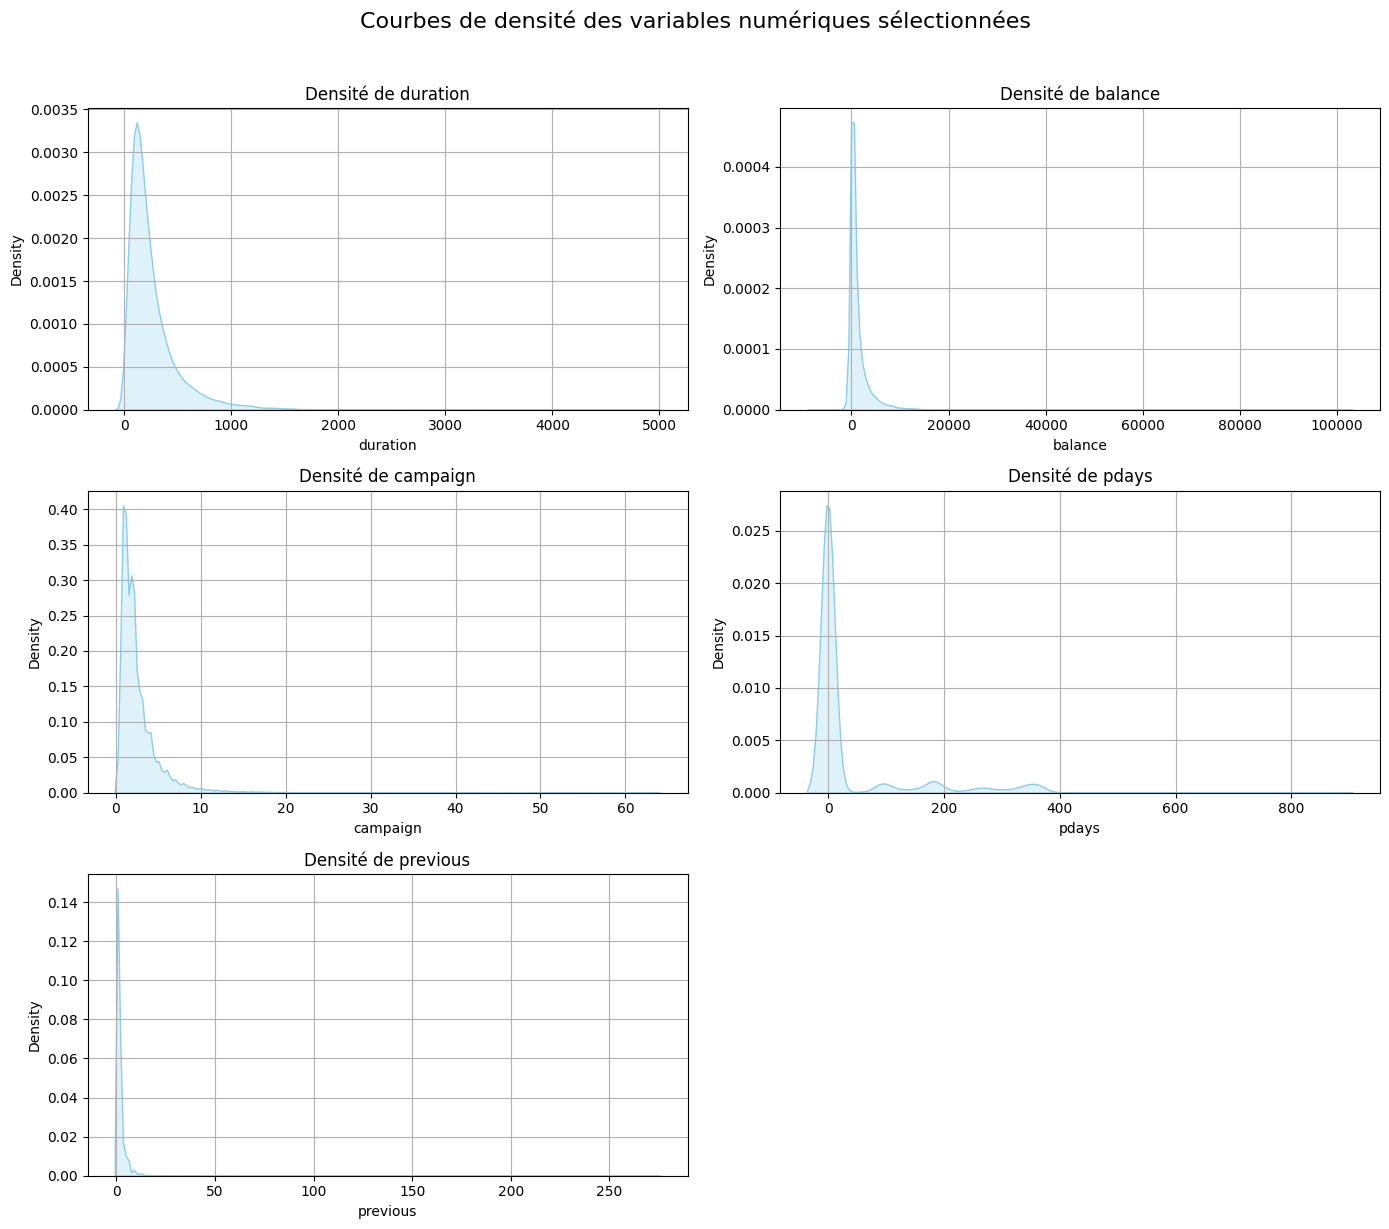

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Variables à visualiser
vars_density = ['duration', 'balance', 'campaign', 'pdays', 'previous']

# Configuration des subplots
n_cols = 2
n_rows = math.ceil(len(vars_density) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()
fig.suptitle("Courbes de densité des variables numériques sélectionnées", fontsize=16, y=1.02)

# Affichage des courbes de densité
for i, col in enumerate(vars_density):
    sns.kdeplot(df_selected[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f"Densité de {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Suppression des sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**# Test de Normalité Shapiro pour comparé la distribution à une normale**

In [79]:
from scipy.stats import shapiro

# Variables numériques à tester
vars_to_test = ['duration', 'balance', 'campaign', 'pdays', 'previous']

print(" Test de normalité (Shapiro) sur les variables numériques :\n")

for col in vars_to_test:
    stat, p = shapiro(df_selected[col])
    print(f" {col} : statistique = {stat:.4f}, p-value = {p:.4f}")
    if p < 0.05:
        print(" Résultat : Distribution NON normale (rejet de H0)\n")
    else:
        print(" Résultat : Distribution possiblement normale (on ne rejette pas H0)\n")

 Test de normalité (Shapiro) sur les variables numériques :

 duration : statistique = 0.7270, p-value = 0.0000
 Résultat : Distribution NON normale (rejet de H0)

 balance : statistique = 0.4572, p-value = 0.0000
 Résultat : Distribution NON normale (rejet de H0)

 campaign : statistique = 0.5507, p-value = 0.0000
 Résultat : Distribution NON normale (rejet de H0)

 pdays : statistique = 0.4748, p-value = 0.0000
 Résultat : Distribution NON normale (rejet de H0)

 previous : statistique = 0.2356, p-value = 0.0000
 Résultat : Distribution NON normale (rejet de H0)



c:\Users\barek\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


---

- Utilisation du test Jarque-Bera pour tester normalité + forme (skew + kurtosis) afin de renforcer l'analyse exploratoire 

**# Jarque-Bera**

In [80]:
from scipy.stats import jarque_bera

# Variables numériques à tester
vars_num = ['duration', 'balance', 'campaign', 'pdays', 'previous']

print(" Test de normalité : Jarque-Bera\n")

for col in vars_num:
    stat, p = jarque_bera(df_selected[col])
    print(f" {col} : statistique = {stat:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print(" Distribution NON normale (rejet de H0)\n")
    else:
        print(" Distribution possiblement normale (on ne rejette pas H0)\n")

 Test de normalité : Jarque-Bera

 duration : statistique = 695178.00, p-value = 0.0000
 Distribution NON normale (rejet de H0)

 balance : statistique = 37838102.16, p-value = 0.0000
 Distribution NON normale (rejet de H0)

 campaign : statistique = 3082193.39, p-value = 0.0000
 Distribution NON normale (rejet de H0)

 pdays : statistique = 142133.04, p-value = 0.0000
 Distribution NON normale (rejet de H0)

 previous : statistique = 38267915786.52, p-value = 0.0000
 Distribution NON normale (rejet de H0)



##### Interprétation des courbes de densité et du Test de Normalité

##### 1. `duration`
 Fortement asymétrique à droite.  
 La plupart des appels sont **très courts**, mais quelques-uns sont **exceptionnellement longs**.  
  **Ne suit pas une loi normale** (skewness élevée, présence d’outliers).
- **Recommandation** : Appliquer une **transformation logarithmique** pour atténuer les extrêmes.



##### 2. `balance`
 Très étalée avec une longue queue à droite.  
 La majorité des clients ont un **solde modéré**, mais certains ont des soldes **très élevés** (outliers).  
  **Ne suit pas une loi normale** (distribution très étirée).
- **Recommandation** : Envisager un **winsorizing** ou une transformation (`log1p`).



##### 3. `campaign`
 Pic très marqué sur les premières valeurs, puis chute rapide.  
 La plupart des clients ont été contactés **1 à 3 fois**. Peu ont été relancés plus.  
  **Ne suit pas une loi normale** (valeurs très concentrées, distribution discrète).
- **Recommandation** : Le **binning** pourrait améliorer la lisibilité pour le modèle (ex : 1 contact / 2–3 / 4+).



##### 4. `pdays`
 Pic très fort sur `-1`, puis faible densité ailleurs.  
 Une majorité de clients **n’ont jamais été recontactés**. Les autres sont très dispersés.  
  **Ne suit pas une loi normale** (distribution bi-modale avec une valeur dominante).
- **Recommandation** : Créer une **variable binaire** : jamais recontacté (`pdays = -1`) vs recontacté (`pdays > 0`).



##### 5. `previous`
 Concentration sur 0, chute rapide ensuite.  
 Très peu de clients ont eu des contacts antérieurs.  
  **Ne suit pas une loi normale** (distribution asymétrique et discrète).
- **Recommandation** : Transformer en binaire : **aucun contact passé vs au moins un**.


#####  Conclusion
Les distributions montrent que plusieurs variables sont :
- **Asymétriques**
- Contiennent des **outliers**
-  Aucune ne suit une **loi normale**

Par ailleurs, il faudrait **transformer ou regrouper ces variables** pour améliorer la performance et la stabilité du modèle.


---

**# Correlation pour identifier les variables fortement liées (positivement ou négativement)**

In [81]:
from scipy.stats import spearmanr

# Création d'une version binaire de y
y_binary = df_selected['y'].map({'no': 0, 'yes': 1})

# Variables numériques à tester
vars_num = ['duration', 'balance', 'campaign', 'pdays', 'previous']

print("Corrélation de Spearman entre chaque variable et y :\n")

for col in vars_num:
    coef, p = spearmanr(df_selected[col], y_binary)
    print(f"{col} : coefficient = {coef:.3f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Corrélation significative avec y\n")
    else:
        print("Pas de corrélation significative\n")

Corrélation de Spearman entre chaque variable et y :

duration : coefficient = 0.342, p-value = 0.0000
Corrélation significative avec y

balance : coefficient = 0.100, p-value = 0.0000
Corrélation significative avec y

campaign : coefficient = -0.084, p-value = 0.0000
Corrélation significative avec y

pdays : coefficient = 0.154, p-value = 0.0000
Corrélation significative avec y

previous : coefficient = 0.169, p-value = 0.0000
Corrélation significative avec y



#####  Résultats 

<h6>

| Variable     | Coefficient | p-value | Interprétation |
|--------------|-------------|---------|----------------|
| duration     | +0.342      | 0.0000  | Relation monotone modérée : plus l’appel est long, plus la probabilité de souscription augmente. |
| balance      | +0.100      | 0.0000  | Corrélation faible mais significative : les clients avec un solde plus élevé souscrivent légèrement plus. |
| campaign     | –0.084      | 0.0000  | Corrélation faible et négative : plus un client est relancé, moins il est susceptible de souscrire. |
| pdays        | +0.154      | 0.0000  | Corrélation faible à modérée : les clients recontactés sont un peu plus réactifs. |
| previous     | +0.169      | 0.0000  | Corrélation faible à modérée : les clients ayant un historique de contact sont plus enclins à souscrire. |
</h6>

- Visualisation de la matrice de corrélation


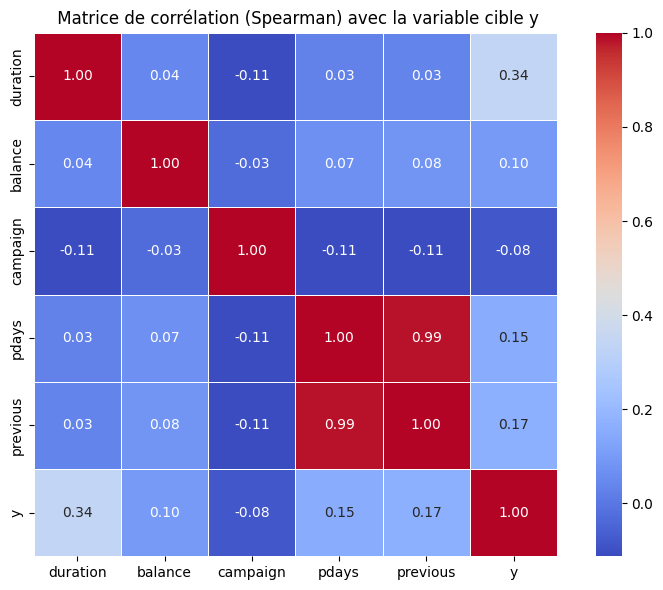

In [82]:
from seaborn import heatmap 
from matplotlib.pyplot import figure, title, tight_layout, show
from pandas import DataFrame

# Créer une version binaire de y
df_corr = df_selected.copy()
df_corr['y'] = df_corr['y'].map({'no': 0, 'yes': 1})

# Variables à inclure dans la matrice
corr_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous', 'y']

# Matrice de corrélation Spearman
corr_matrix = df_corr[corr_vars].corr(method='spearman')

# Affichage de la heatmap
figure(figsize=(8, 6))
heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
title(" Matrice de corrélation (Spearman) avec la variable cible y")
tight_layout()
show()

#####  Analyse de la matrice de corrélation (Spearman) avec la variable cible `y`

##### Corrélation avec la variable cible `y`

<h6>

| Variable     | Corrélation | Interprétation |
|--------------|-------------|----------------|
| `duration`   | +0.34       | Corrélation modérée. Plus l’appel est long, plus la probabilité de souscription augmente. Variable la plus discriminante. |
| `previous`   | +0.17       | Corrélation faible à modérée. Les clients ayant déjà été contactés sont plus enclins à souscrire. |
| `pdays`      | +0.15       | Corrélation faible à modérée. Être recontacté (et le délai) influence légèrement la conversion. |
| `balance`    | +0.10       | Corrélation faible mais significative. Les clients avec un solde plus élevé ont un peu plus de chances de souscrire. |
| `campaign`   | –0.08       | Corrélation faible et négative. Trop de sollicitations réduisent légèrement la probabilité de souscription. |
</h6>


##### Corrélation entre les variables explicatives

<h6>

| Variables            | Corrélation | Interprétation |
|----------------------|-------------|----------------|
| `pdays` & `previous` | +0.99       | Corrélation presque parfaite. Variables quasi redondantes : ne pas les utiliser ensemble dans un modèle. |
| `balance` & autres   | <h6 ±0.10     | Peu de corrélations : `balance` est indépendante et utilisable. |
| `duration` & autres  | très faible | `duration` est indépendante, donc très utile pour la modélisation. |
</h6>

##### Conclusion

- `duration` est la variable la plus informative.
- `pdays` et `previous` : à ne **pas utiliser ensemble** à cause de leur redondance.
- `campaign` a un effet négatif modéré → à considérer avec prudence.
- `balance` reste une variable faible mais complémentaire.

---

**# Test d’indépendance avec ANOVA**

- Pour savoir si la moyenne d’une variable numérique varie significativement selon les modalités d’une variable catégorielle.

In [83]:
# Installation du module statsmodels pour effectuer le test ANOVA
%pip install statsmodels



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Visualisations

In [84]:
# Colonnes utiles
selected_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']
cat_vars = ['job', 'education', 'contact', 'poutcome', 'month']

#  df_full avec variables numériques + qualitatives + cible
df_full = X_cleaned[selected_vars + cat_vars].copy()
df_full['y'] = y_cleaned['y']

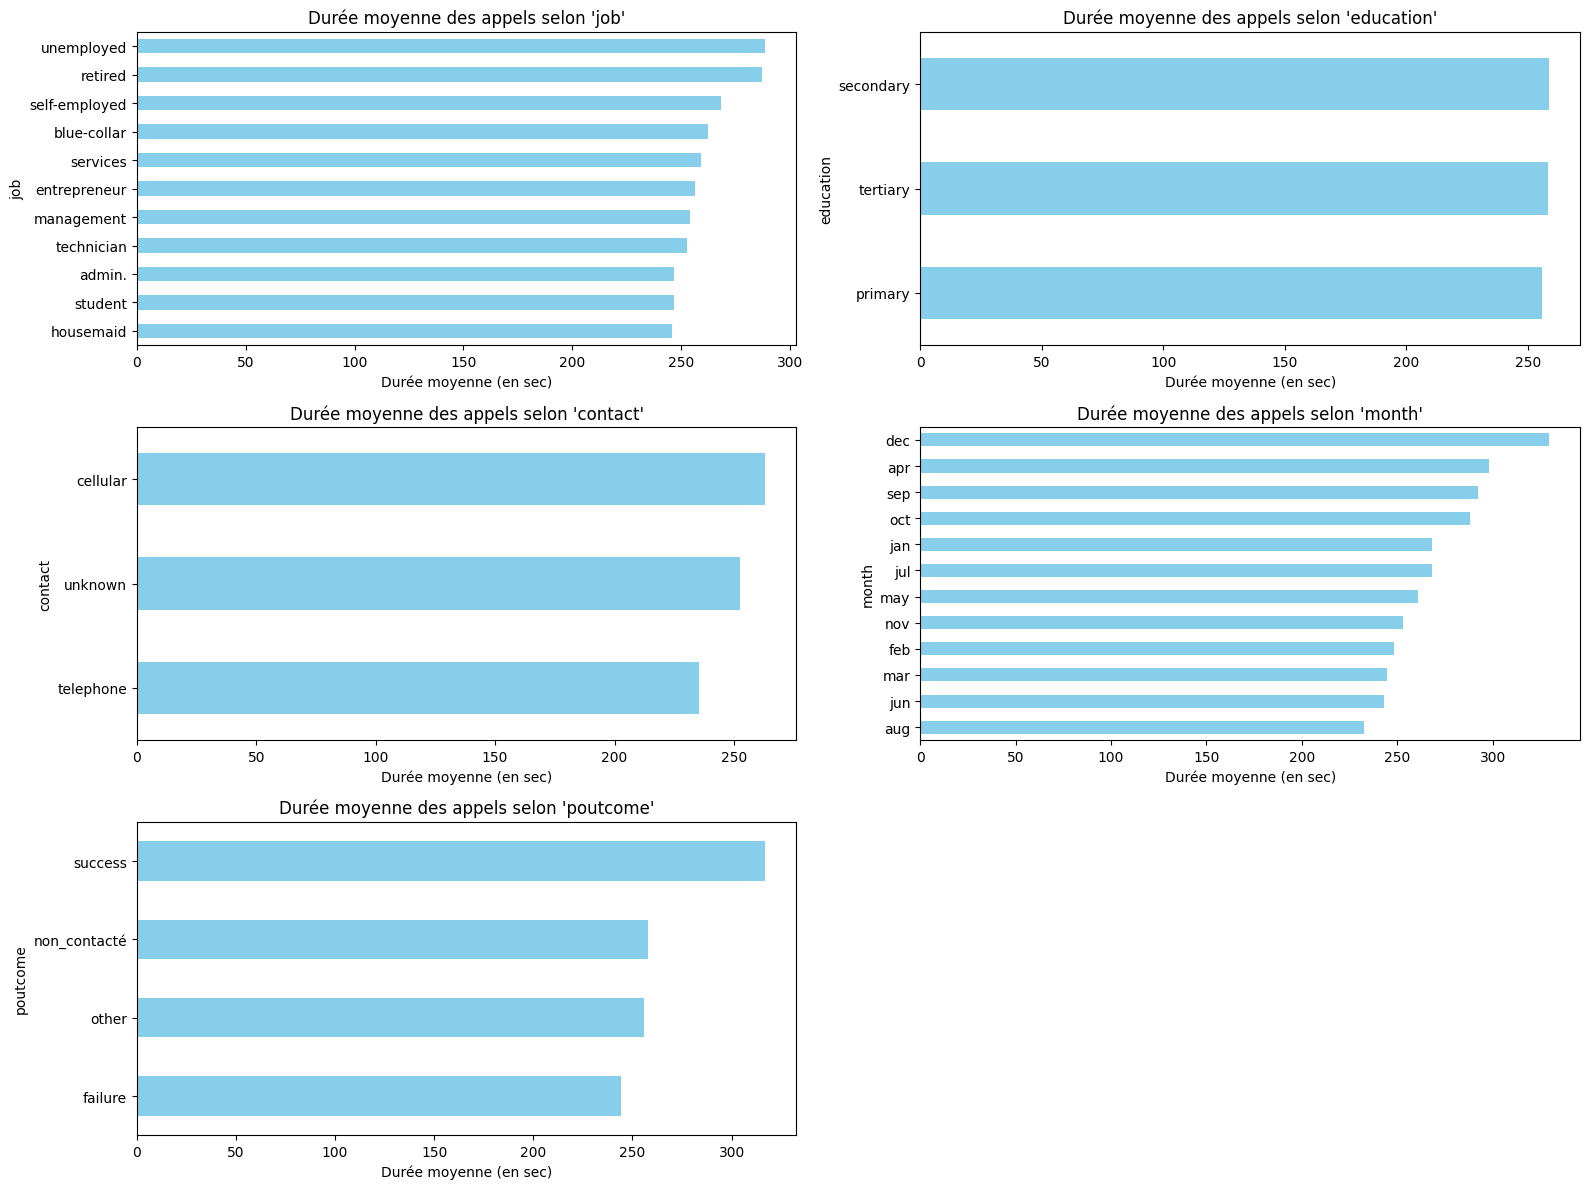

In [85]:
import matplotlib.pyplot as plt
import math

# Variables qualitatives à visualiser
qual_vars = ['job', 'education', 'contact', 'month', 'poutcome']

# Configuration des subplots
n_cols = 2
n_rows = math.ceil(len(qual_vars) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Affichage des barplots pour la durée moyenne par modalité
for i, col in enumerate(qual_vars):
    df_full.groupby(col)['duration'].mean().sort_values().plot(
        kind='barh', ax=axes[i], color='skyblue'
    )
    axes[i].set_title(f"Durée moyenne des appels selon '{col}'")
    axes[i].set_xlabel("Durée moyenne (en sec)")
    axes[i].set_ylabel(col)

# Suppression des axes inutilisés si nombre impair
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<div style="font-size:14px">

<h3> Analyse des durées moyennes d’appel selon les variables qualitatives</h3>


<h4>1. <code>job</code> – Durée moyenne selon le métier</h4>
<ul>
  <li>Les <strong>unemployed</strong>, <strong>retired</strong>, et <strong>self-employed</strong> ont les <strong>appels les plus longs</strong>.</li>
  <li>Les profils comme <code>housemaid</code>, <code>student</code> et <code>admin.</code> ont des appels plus courts.</li>
  <li>Cette variation peut refléter une <strong>plus grande disponibilité ou implication</strong de certains groupes.</li>
</ul>

<h4>2. <code>education</code> – Durée moyenne selon le niveau d’études</h4>
<ul>
  <li>Les trois niveaux <code>primary</code>, <code>secondary</code>, <code>tertiary</code> présentent des durées très proches (≈ 250–260 sec).</li>
  <li>Le niveau d’éducation semble donc <strong>peu discriminant</strong> pour la durée d’appel.</li>
</ul>

<h4>3. <code>contact</code> – Durée moyenne selon le canal de contact</h4>
<ul>
  <li><code>cellular</code> entraîne des appels plus longs que <code>telephone</code>.</li>
  <li><code>unknown</code> est proche de <code>cellular</code> en durée moyenne.</li>
  <li>Indique une <strong>meilleure efficacité de contact mobile</strong> pour maintenir le client en ligne.</li>
</ul>

<h4>4. <code>month</code> – Durée moyenne selon le mois de l’appel</h4>
<ul>
  <li>Les mois avec les <strong>appels les plus longs</strong> : <code>dec</code>, <code>apr</code>, <code>sep</code>.</li>
  <li>Les mois les plus courts : <code>aug</code>, <code>jun</code>, <code>mar</code>.</li>
  <li><strong>Décembre</strong> ressort comme période propice à des échanges plus longs (fin d’année, offres ?).</li>
</ul>

<h4>5. <code>poutcome</code> – Durée moyenne selon le résultat de la campagne précédente</h4>
<ul>
  <li>Les clients avec un <code>success</code> précédent ont les <strong>appels les plus longs</strong>.</li>
  <li><code>failure</code> ou <code>non_contacté</code> sont associés à des durées plus courtes.</li>
  <li>Les clients déjà convaincus semblent plus ouverts à des échanges prolongés.</li>
</ul>


<h4> Conclusion</h4>
<ul>
  <li><strong>job</strong>, <strong>poutcome</strong> et <strong>month</strong> influencent fortement la durée des appels.</li>
  <li><strong>contact</strong> a un impact modéré, <strong>education</strong> est peu différenciante.</li>
  <li>Ces résultats sont utiles pour <strong>adapter les stratégies de contact et de priorisation des profils</strong>.</li>
</ul>

</div>


---
Test

In [86]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fusion X_cleaned + y_cleaned
df_full = X_cleaned.copy()
df_full['y'] = y_cleaned['y']

# Variables qualitatives à tester
qual_vars = ['job', 'education', 'contact', 'month', 'poutcome']

# Test ANOVA sur la variable 'duration'
print(" Test ANOVA : influence des variables qualitatives sur la moyenne de 'duration'\n")

for cat in qual_vars:
    model = ols(f'duration ~ C({cat})', data=df_full).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table["PR(>F)"].iloc[0]  
    
    print(f" {cat} vs duration → p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f" Influence significative : la variable '{cat}' affecte la durée moyenne\n")
    else:
        print(f" Pas d'influence significative de '{cat}' sur la durée\n")

 Test ANOVA : influence des variables qualitatives sur la moyenne de 'duration'

 job vs duration → p-value = 0.0000
 Influence significative : la variable 'job' affecte la durée moyenne

 education vs duration → p-value = 0.7386
 Pas d'influence significative de 'education' sur la durée

 contact vs duration → p-value = 0.0000
 Influence significative : la variable 'contact' affecte la durée moyenne

 month vs duration → p-value = 0.0000
 Influence significative : la variable 'month' affecte la durée moyenne

 poutcome vs duration → p-value = 0.0000
 Influence significative : la variable 'poutcome' affecte la durée moyenne



##### Résultats du test ANOVA – Influence des variables qualitatives sur `duration`

<h6>

| Variable qualitative | p-value  | Influence significative ? | Interprétation |
|----------------------|----------|----------------------------|----------------|
| `job`               | 0.0000   | ✅ Oui                     | Certaines professions génèrent des appels plus longs. |
| `education`         | 0.7386   | ❌ Non                     | Le niveau d’éducation n’a pas d’effet clair sur la durée des appels. |
| `contact`           | 0.0000   | ✅ Oui                     | Le type de canal (mobile, téléphone...) influence la durée. |
| `month`             | 0.0000   | ✅ Oui                     | Le mois de l’appel affecte la durée moyenne des échanges. |
| `poutcome`          | 0.0000   | ✅ Oui                     | Le résultat d’une campagne précédente impacte la durée actuelle de l’appel. |
</h6>

----

Test ANOVA sur balance pour savoir si certaines variables qualitatives influencent le solde bancaire (balance).

- Utile pour explorer le pouvoir d’épargne ou segmenter les profils,
mais pas indispensable si nous nous focalisons uniquement sur la prédiction de y.

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fusion X_cleaned + y_cleaned
df_full = X_cleaned.copy()
df_full['y'] = y_cleaned['y']

# Variables qualitatives à tester
qual_vars = ['job', 'education', 'contact', 'month', 'poutcome']

# Test ANOVA sur la variable numérique 'balance'
print(" Test ANOVA : influence des variables qualitatives sur la moyenne de 'balance'\n")

for cat in qual_vars:
    model = ols(f'balance ~ C({cat})', data=df_full).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table["PR(>F)"].iloc[0]  
    
    print(f" {cat} vs balance → p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f" Influence significative : la variable '{cat}' affecte le solde moyen\n")
    else:
        print(f" Pas d'influence significative de '{cat}' sur le solde\n")

 Test ANOVA : influence des variables qualitatives sur la moyenne de 'balance'

 job vs balance → p-value = 0.0000
 Influence significative : la variable 'job' affecte le solde moyen

 education vs balance → p-value = 0.0000
 Influence significative : la variable 'education' affecte le solde moyen

 contact vs balance → p-value = 0.0000
 Influence significative : la variable 'contact' affecte le solde moyen

 month vs balance → p-value = 0.0000
 Influence significative : la variable 'month' affecte le solde moyen

 poutcome vs balance → p-value = 0.0000
 Influence significative : la variable 'poutcome' affecte le solde moyen



##### Résultats du test ANOVA – Influence des variables qualitatives sur `balance`

<h6>

| Variable qualitative | p-value  | Influence significative ? | Interprétation |
|----------------------|----------|----------------------------|----------------|
| `job`               | 0.0000   | ✅ Oui                     | Le solde bancaire varie significativement selon le métier du client. |
| `education`         | 0.0000   | ✅ Oui                     | Le niveau d’éducation influence fortement le solde moyen. |
| `contact`           | 0.0000   | ✅ Oui                     | Le canal de contact utilisé semble lié à la capacité financière. |
| `month`             | 0.0000   | ✅ Oui                     | Le mois de contact est associé à des variations de solde. |
| `poutcome`          | 0.0000   | ✅ Oui                     | Le résultat d’une campagne précédente est fortement lié au solde du client. |
</h6>

Ces résultats sont utiles pour éventuellement :

- Segmenter les clients selon leur pouvoir d’épargne.

- Adapter les offres (ex : dépôts à terme, crédits) en fonction du profil.

---

**# Analyse des variables qualitatives vs 'y'**


Cette analyse permet de :
- Identifier quelles catégories sont les plus susceptibles de souscrire.

- Repérer les profils à éviter ou à prioriser dans les campagnes marketing.

- Créer des taux de souscription par modalité.

In [88]:
qual_vars = [
    'job',          # Profession
    'education',    # Niveau d'éducation
    'contact',      # Type de canal (cellular, telephone)
    'month',        # Mois de la campagne
    'poutcome',     # Résultat de la campagne précédente
]
print(" Variables qualitatives à tester \n")

 Variables qualitatives à tester 



In [89]:
# Liste des variables qualitatives à analyser
qual_vars = ['job', 'education', 'contact', 'month', 'poutcome']

print(" Répartition des modalités des variables qualitatives selon la variable cible `y` (yes / no)\n")

for col in qual_vars:
    print(f" {col} vs y (% de 'yes' par modalité)\n")
    # Table de fréquence relative normalisée (par ligne)
    table = pd.crosstab(df_full[col], df_full['y'], normalize='index') * 100
    display(table.round(2))  # Affiche en % avec 2 décimales
    print("-" * 60)

 Répartition des modalités des variables qualitatives selon la variable cible `y` (yes / no)

 job vs y (% de 'yes' par modalité)



y,no,yes
job,,
admin.,87.80,12.20
blue-collar,92.59,7.41
entrepreneur,91.73,8.27
housemaid,91.21,8.79
management,86.24,13.76
retired,77.21,22.79
self-employed,88.16,11.84
services,91.12,8.88
student,71.32,28.68


------------------------------------------------------------
 education vs y (% de 'yes' par modalité)



y,no,yes
education,,
primary,91.37,8.63
secondary,89.22,10.78
tertiary,84.99,15.01


------------------------------------------------------------
 contact vs y (% de 'yes' par modalité)



y,no,yes
contact,,
cellular,85.08,14.92
telephone,86.58,13.42
unknown,95.93,4.07


------------------------------------------------------------
 month vs y (% de 'yes' par modalité)



y,no,yes
month,,
apr,80.32,19.68
aug,88.99,11.01
dec,53.27,46.73
feb,83.35,16.65
jan,89.88,10.12
jul,90.91,9.09
jun,89.78,10.22
mar,48.01,51.99
may,93.28,6.72


------------------------------------------------------------
 poutcome vs y (% de 'yes' par modalité)



y,no,yes
poutcome,,
failure,87.39,12.61
non_contacté,90.84,9.16
other,83.32,16.68
success,35.27,64.73


------------------------------------------------------------


##### Analyse des variables qualitatives – Répartition des modalités selon `y`

##### `job` vs souscription


| Métier           | % Yes  | Interprétation |
|------------------|--------|----------------|
| student          | 28.68% | Très réceptif |
| retired          | 22.79% | Réactif |
| unemployed       | 15.50% | Réactif |
| management       | 13.76% | Moyennement réceptif |
| blue-collar      | 7.41%  | Moins réceptif |



##### `education` vs souscription

| Niveau d'étude   | % Yes  | Interprétation |
|------------------|--------|----------------|
| tertiary         | 15.01% | Plus réceptif |
| secondary        | 10.78% | Moyennement réceptif |
| primary          | 8.63%  | Moins réceptif |



##### `contact` vs souscription

| Canal            | % Yes  | Interprétation |
|------------------|--------|----------------|
| cellular         | 14.92% | Canal le plus efficace |
| telephone        | 13.42% | Canal secondaire |
| unknown          | 4.07%  | Canal peu efficace |



##### `month` vs souscription

| Mois             | % Yes  | Interprétation |
|------------------|--------|----------------|
| mar              | 51.99% | Mois le plus performant |
| dec              | 46.73% | Très bon mois |
| sep              | 46.46% | Très bon mois |
| may              | 6.72%  | Mois à éviter |



##### `poutcome` vs souscription

| Résultat précédent | % Yes  | Interprétation |
|--------------------|--------|----------------|
| success            | 64.73% | Très fort impact |
| other              | 16.68% | Impact modéré |
| failure            | 12.61% | Faible impact |
| non_contacté       | 9.16%  | Très faible impact |



##### Recommandations :

- Cibler en priorité les profils : student, retired, unemployed  
- Privilégier le canal `cellular`  
- Concentrer les campagnes sur les mois : mar, dec, sept  
- Recontacter les clients ayant eu un résultat `success` lors d'une précédente campagne  
- Éviter ou minimiser les campagnes en mai, et sur des profils moins réceptifs comme blue-collar et primary éducation

---


**# Test Khi² pour chaque variable qualitative vs y**
- Vérifier si deux variables qualitatives sont indépendantes
 

Visualisation des Variables qualitatives 

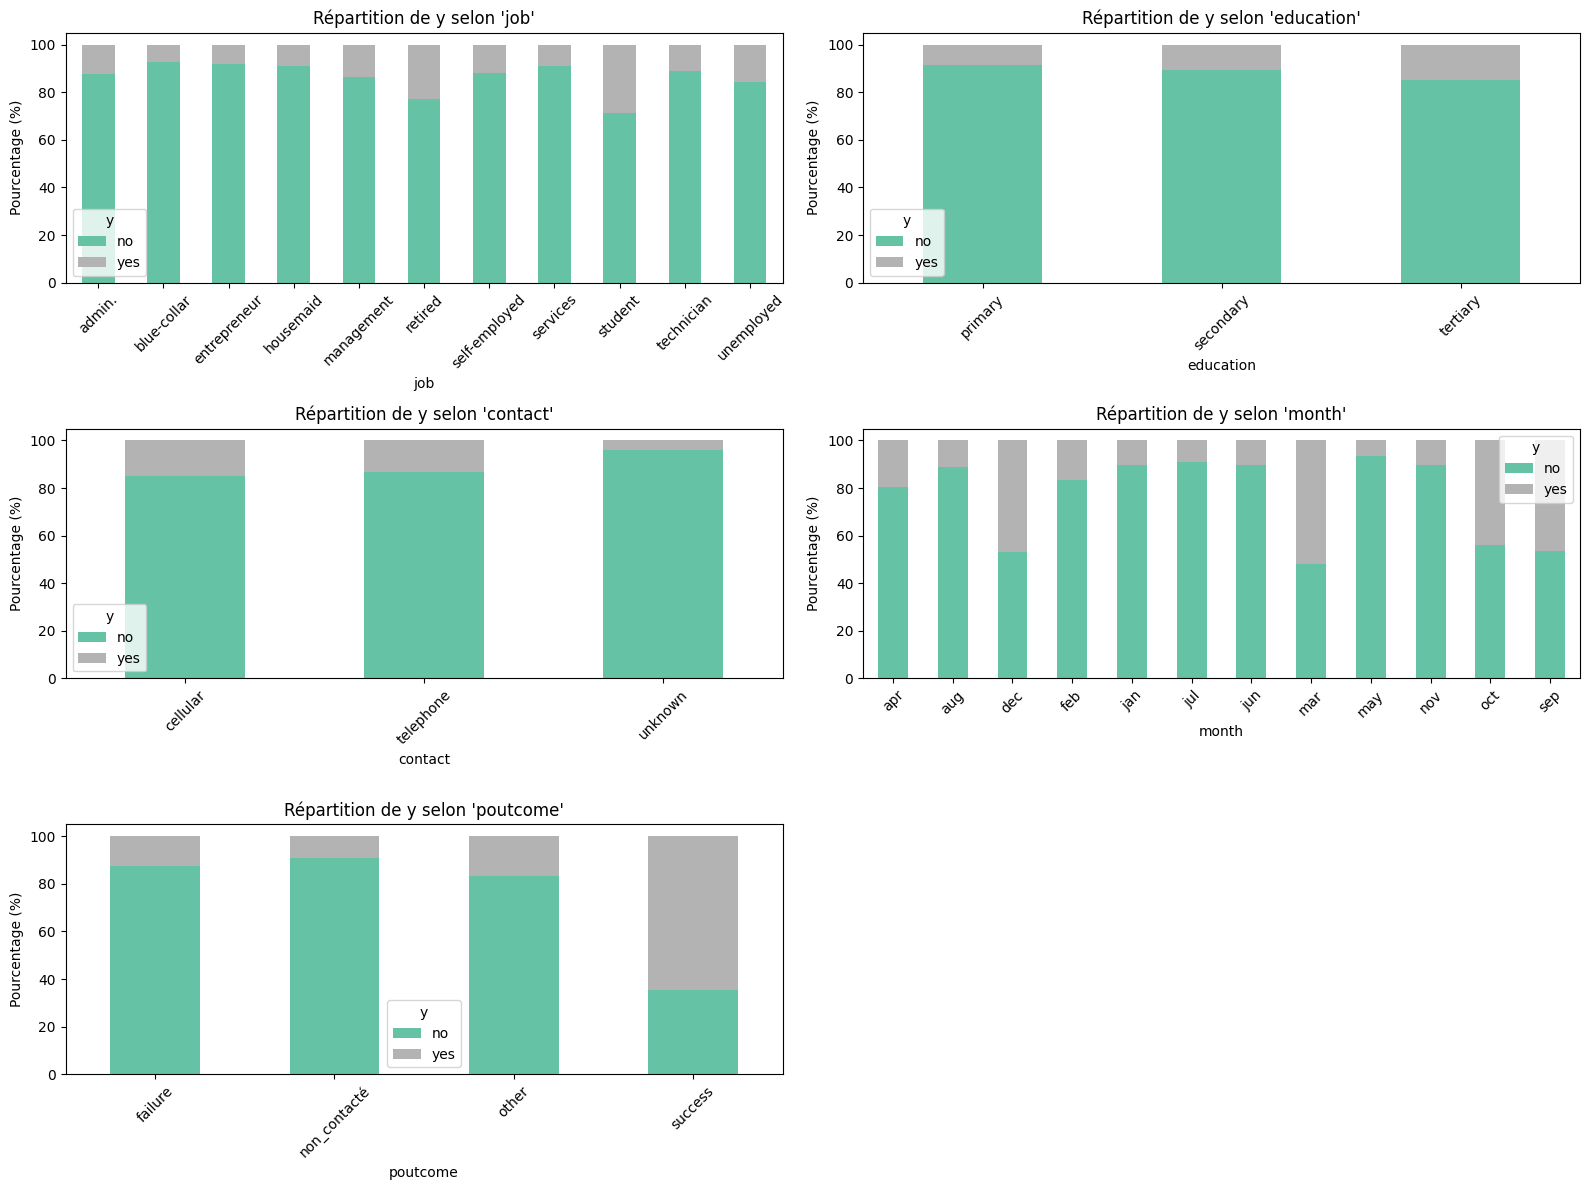

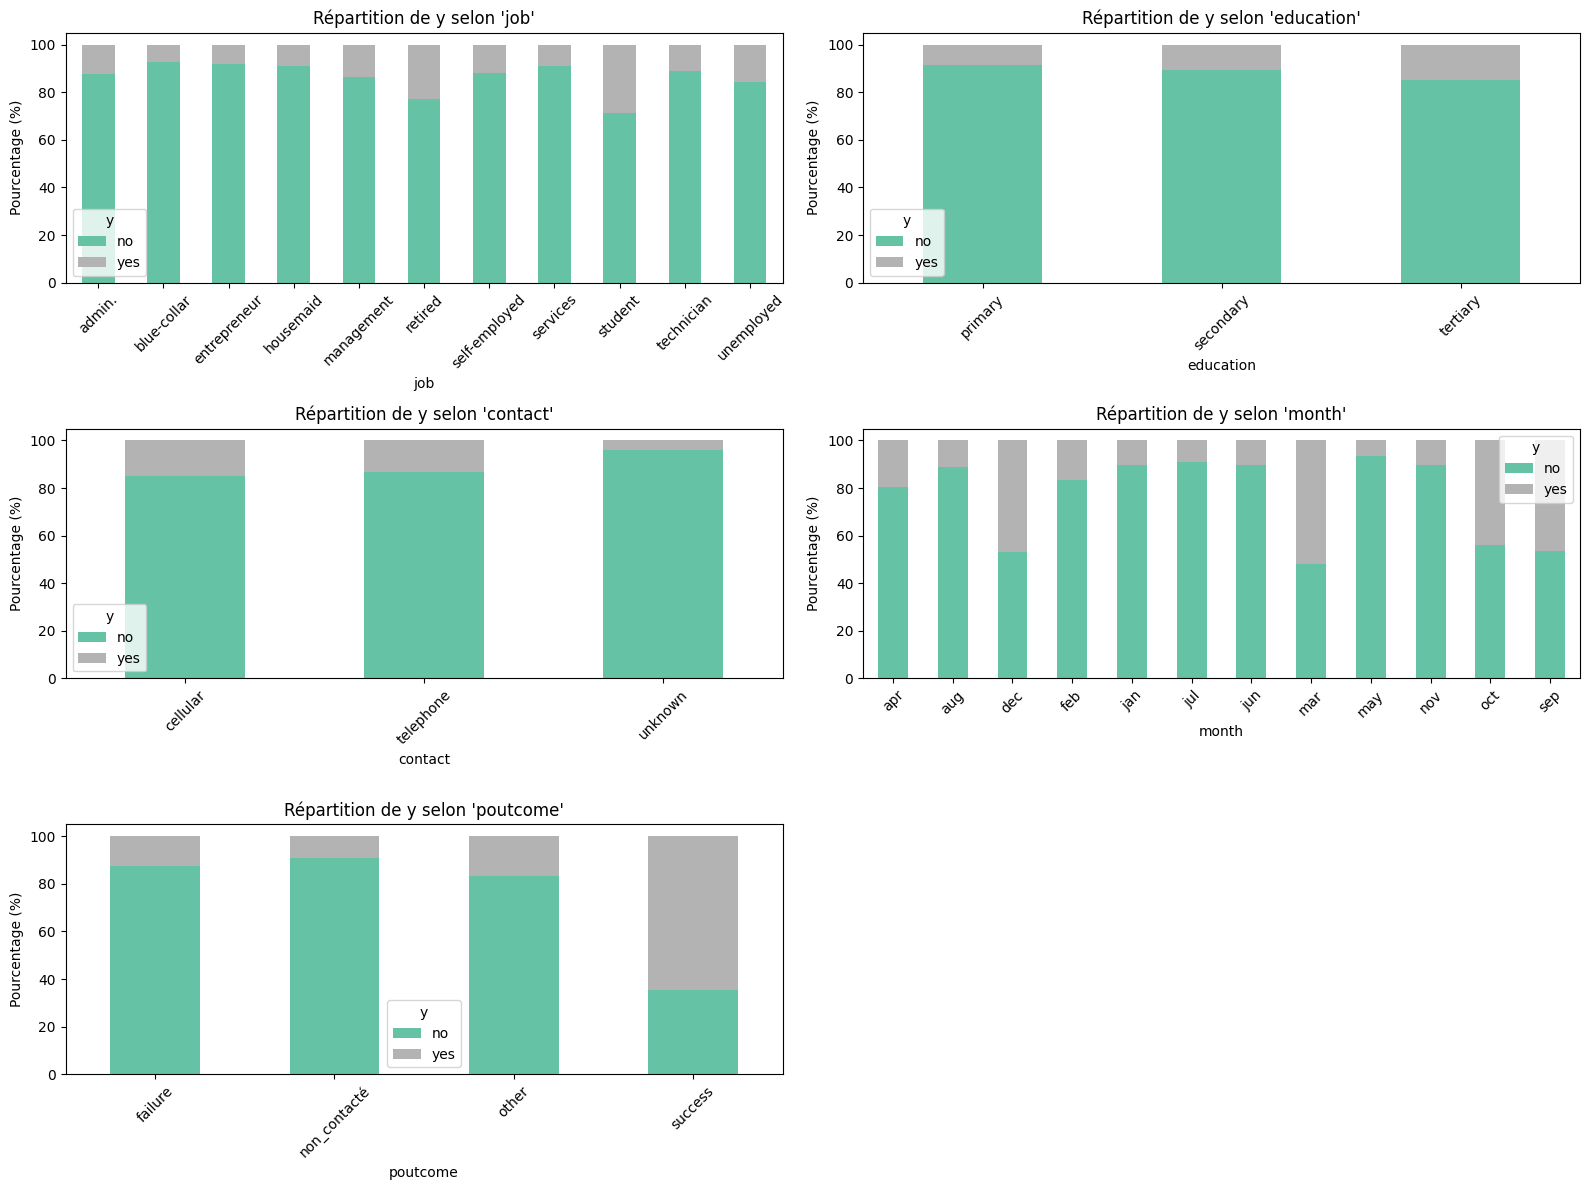

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import math

import pandas as pd
import matplotlib.pyplot as plt
import math

# Variables qualitatives à visualiser
qual_vars = ['job', 'education', 'contact', 'month', 'poutcome']

# Préparation des subplots
n_cols = 2
n_rows = math.ceil(len(qual_vars) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Génération des graphiques
for i, col in enumerate(qual_vars):
    plot_data = pd.crosstab(df_full[col], df_full['y'], normalize='index') * 100
    plot_data.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f"Répartition de y selon '{col}'")
    axes[i].set_ylabel("Pourcentage (%)")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='y')

# Suppression des axes vides s’il y a lieu
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
qual_vars = ['job', 'education', 'contact', 'month', 'poutcome']

# Préparation des subplots
n_cols = 2
n_rows = math.ceil(len(qual_vars) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Génération des graphiques
for i, col in enumerate(qual_vars):
    plot_data = pd.crosstab(df_full[col], df_full['y'], normalize='index') * 100
    plot_data.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f"Répartition de y selon '{col}'")
    axes[i].set_ylabel("Pourcentage (%)")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='y')

# Suppression des axes vides s’il y a lieu
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="font-size:14px">

<h3> Analyse de la répartition de <code>y</code> selon les variables qualitatives</h3>


<h4>1. <code>job</code> – Répartition par métier</h4>
<ul>
  <li>Les catégories <strong>student</strong>, <strong>retired</strong> et <strong>unemployed</strong> présentent une proportion plus élevée de souscriptions (<code>yes</code>).</li>
  <li>Des métiers comme <code>housemaid</code>, <code>blue-collar</code> et <code>services</code> montrent une prédominance de <code>no</code>.</li>
  <li>Le métier est donc un bon <strong>facteur de ciblage</strong> pour les campagnes.</li>
</ul>

<h4>2. <code>education</code> – Répartition par niveau d'études</h4>
<ul>
  <li>Les clients avec un niveau <strong>tertiary</strong> ou <strong>secondary</strong> ont un taux de <code>yes</code> légèrement supérieur à ceux en <code>primary</code>.</li>
  <li>L'effet est modéré, mais le niveau d’étude peut aider à <strong>segmenter</strong>.</li>
</ul>

<h4>3. <code>contact</code> – Répartition par canal de contact</h4>
<ul>
  <li>Le canal <strong>cellular</strong> génère plus de souscriptions que <code>telephone</code> ou <code>unknown</code>.</li>
  <li>Il est donc <strong>stratégiquement plus efficace</strong> pour convertir les clients.</li>
</ul>

<h4>4. <code>month</code> – Répartition par mois de contact</h4>
<ul>
  <li>Les mois <strong>march</strong>, <strong>december</strong> et <strong>september</strong> présentent les taux de conversion les plus élevés.</li>
  <li>À l'inverse, <code>may</code> et <code>july</code> montrent de faibles performances.</li>
  <li>Le mois d’appel a un <strong>impact significatif sur l’efficacité des campagnes</strong>.</li>
</ul>

<h4>5. <code>poutcome</code> – Résultat de la campagne précédente</h4>
<ul>
  <li>Les clients ayant eu un précédent <code>success</code> ont une forte proportion de <code>yes</code>.</li>
  <li>Ceux associés à <code>failure</code> ou <code>non_contacté</code> restent largement en <code>no</code>.</li>
  <li>C’est une <strong>variable fortement prédictive</strong> du comportement futur.</li>
</ul>


<h4> Synthèse stratégique</h4>

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Influence sur <code>y</code></th>
      <th>Observation clé</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>job</code></td>
      <td>Élevée</td>
      <td>Étudiants et retraités sont très réceptifs</td>
    </tr>
    <tr>
      <td><code>education</code></td>
      <td>Moyenne</td>
      <td>Niveau plus élevé = plus de souscriptions</td>
    </tr>
    <tr>
      <td><code>contact</code></td>
      <td>Moyenne à élevée</td>
      <td><code>cellular</code> est le canal le plus performant</td>
    </tr>
    <tr>
      <td><code>month</code></td>
      <td>Forte</td>
      <td><code>mar</code>, <code>dec</code>, <code>sep</code> = périodes propices</td>
    </tr>
    <tr>
      <td><code>poutcome</code></td>
      <td>Très forte</td>
      <td>Un succès passé est un excellent indicateur de souscription</td>
    </tr>
  </tbody>
</table>

</div>

---
Test Khi²

In [91]:
from scipy.stats import chi2_contingency
import pandas as pd

# Variables qualitatives à tester
qual_vars = ['job', 'education', 'contact', 'month', 'poutcome']

print(" Test d'indépendance Khi² entre les variables qualitatives et y\n")

for col in qual_vars:
    table = pd.crosstab(df_full[col], df_full['y'])
    chi2, p, dof, expected = chi2_contingency(table)
    
    print(f" {col} vs y → p-value = {p:.4f}")
    if p < 0.05:
        print(f" L'association est significative : {col} dépend de y\n")
    else:
        print(f" Aucune association significative détectée entre {col} et y\n")

 Test d'indépendance Khi² entre les variables qualitatives et y

 job vs y → p-value = 0.0000
 L'association est significative : job dépend de y

 education vs y → p-value = 0.0000
 L'association est significative : education dépend de y

 contact vs y → p-value = 0.0000
 L'association est significative : contact dépend de y

 month vs y → p-value = 0.0000
 L'association est significative : month dépend de y

 poutcome vs y → p-value = 0.0000
 L'association est significative : poutcome dépend de y



<div style="font-size:14px">

<h4> Résultats du test d'indépendance Khi² entre les variables qualitatives et la cible <code>y</code></h4>

<h4> Hypothèse testée</h4>
<ul>
  <li><strong>H₀ :</strong> la variable est indépendante de <code>y</code> (aucune influence).</li>
  <li><strong>H₁ :</strong> la variable est associée à <code>y</code> (lien significatif détecté).</li>
</ul>


<h4> Résultats du test</h4>

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>p-value</th>
      <th>Conclusion</th>
      <th>Interprétation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>job</code></td>
      <td>0.0000</td>
      <td>Rejet de H₀</td>
      <td>Le métier influence significativement la souscription.</td>
    </tr>
    <tr>
      <td><code>education</code></td>
      <td>0.0000</td>
      <td>Rejet de H₀</td>
      <td>Le niveau d’éducation est lié au comportement de réponse.</td>
    </tr>
    <tr>
      <td><code>contact</code></td>
      <td>0.0000</td>
      <td>Rejet de H₀</td>
      <td>Le canal de contact a un effet sur la probabilité de souscription.</td>
    </tr>
    <tr>
      <td><code>month</code></td>
      <td>0.0000</td>
      <td>Rejet de H₀</td>
      <td>Le mois de contact modifie la répartition des réponses <code>y</code>.</td>
    </tr>
    <tr>
      <td><code>poutcome</code></td>
      <td>0.0000</td>
      <td>Rejet de H₀</td>
      <td>Le résultat de la campagne précédente est fortement associé à la réponse actuelle.</td>
    </tr>
  </tbody>
</table>


<h4> Conclusion</h4>
<ul>
  <li>Toutes les variables testées sont <strong>significativement liées à la variable cible</strong>.</li>
  <li>Leurs modalités influencent la répartition de <code>yes</code> et <code>no</code>.</li>
  <li>Ces variables peuvent être <strong>éventuellement recommandées pour la modélisation</strong>.</li>
</ul>

</div>

 <div style="display: flex; background-color: #2E2F8F;" >
<h4 style="margin: auto; padding: 15px; ">Analyse Multivariée
</h4>

</div>
<p>
Etudier plusieurs variables en même temps pour :

- Détecter des relations croisées,

- Identifier des profils ou des structures dans les données,

- Construire des modèles prédictifs ou explicatifs.</p>

---

In [92]:
# Liste des variables ciblées
selected_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']

# Création du sous-ensemble avec X_cleaned
X_selected = X_cleaned[selected_vars].copy()

# Ajout de la variable cible
df_selected = X_selected.copy()
df_selected['y'] = y_cleaned['y']

# Affichage des premières lignes
df_selected.head()

,duration,balance,campaign,pdays,previous,y
0,261,2143,1,-1,0,no
1,151,29,1,-1,0,no
2,76,2,1,-1,0,no
3,92,1506,1,-1,0,no
4,198,1,1,-1,0,no


**# Matrice de corrélation (Pearson)**
- Voir les liens linéaires entre variables


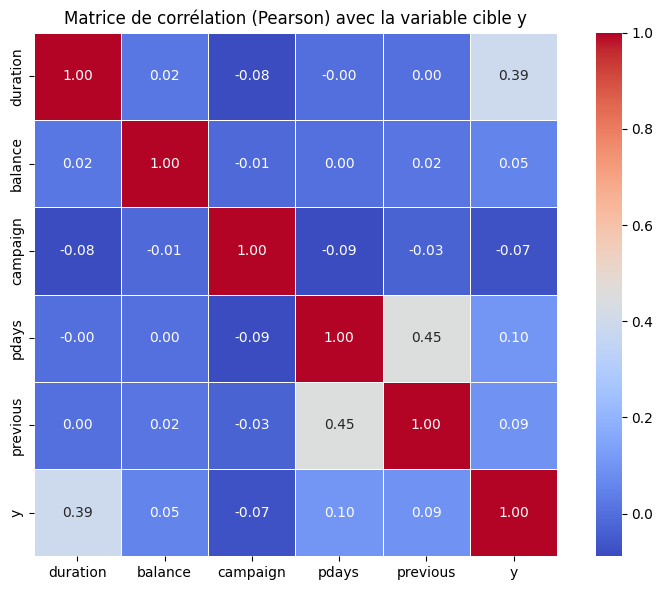

In [93]:
from seaborn import heatmap
from matplotlib.pyplot import figure, title, tight_layout, show

# Créer une version binaire de y : 'yes' → 1, 'no' → 0
df_corr = df_selected.copy()
df_corr['y'] = df_corr['y'].map({'no': 0, 'yes': 1})

# Liste des variables numériques + y
vars_with_target = ['duration', 'balance', 'campaign', 'pdays', 'previous', 'y']

# Calcul de la matrice de corrélation
corr_matrix = df_corr[vars_with_target].corr(method='pearson')

# Affichage de la heatmap
figure(figsize=(8, 6))
heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
title("Matrice de corrélation (Pearson) avec la variable cible y")
tight_layout()
show()

#####  Interprétation de la matrice de corrélation (Pearson)

<h6>

| Variable ↔ y     | Corrélation | Interprétation |
|------------------|-------------|----------------|
| duration ↔ y     | +0.39       | C’est la variable **la plus corrélée** à la souscription. Plus l’appel est long, plus la probabilité de souscription est élevée. |
| balance ↔ y      | +0.05       | Corrélation **très faible**, mais positive. Les clients avec un solde légèrement plus élevé souscrivent un peu plus. |
| campaign ↔ y     | –0.07       | Corrélation faible et **négative**. Un nombre élevé de sollicitations est associé à un **taux de souscription plus faible**. |
| pdays ↔ y        | +0.10       | Corrélation faible et positive. Les clients recontactés récemment ont **plus de chances** de souscrire. |
| previous ↔ y     | +0.09       | Corrélation faible. Les clients ayant déjà été contactés dans le passé sont **légèrement plus enclins** à souscrire. |
</h6>


##### Recommandations

<h6>


| Action à entreprendre             | Justification |
|----------------------------------|---------------|
| Conserver `duration`             | Variable **la plus discriminante** pour la souscription. |
| Garder `pdays` et `previous`     | Peu corrélées à `y`, mais apportent de l'information comportementale utile. |
| Réduire ou transformer `campaign`| Faible impact négatif, possible effet d’usure à modéliser différemment. |
| Inclure `balance` (optionnel)    | Peu corrélée mais utile pour le contexte économique du client. |

</h6>

---

**# Corrélation partielle** 	
- Voir les liens entre 2 variables en contrôlant les autres

In [94]:
%pip install pingouin


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
import pingouin as pg


df_corr = df_selected.copy()
df_corr['y'] = df_corr['y'].map({'no': 0, 'yes': 1})

# Liste des variables numériques 
vars_to_test = ['duration', 'balance', 'campaign', 'pdays', 'previous']

print("Corrélations partielles avec y (contrôle des autres variables) :\n")

for var in vars_to_test:
    control_vars = [v for v in vars_to_test if v != var]
    result = pg.partial_corr(data=df_corr, x=var, y='y', covar=control_vars, method='pearson')
    
    # 
    r = result.iloc[0]['r']
    p = result.iloc[0]['p-val']
    
    print(f"{var} ↔ y : r = {r:.3f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Corrélation partielle significative\n")
    else:
        print("Pas de corrélation partielle significative\n")

Corrélations partielles avec y (contrôle des autres variables) :

duration ↔ y : r = 0.394, p-value = 0.0000
Corrélation partielle significative

balance ↔ y : r = 0.047, p-value = 0.0000
Corrélation partielle significative

campaign ↔ y : r = -0.034, p-value = 0.0000
Corrélation partielle significative

pdays ↔ y : r = 0.074, p-value = 0.0000
Corrélation partielle significative

previous ↔ y : r = 0.055, p-value = 0.0000
Corrélation partielle significative



##### Corrélations partielles avec la variable cible `y`

<h6>

| Variable     | Corrélation partielle (r) | p-value  | Interprétation |
|--------------|----------------------------|----------|----------------|
| duration     | +0.394                     | 0.0000   | Corrélation forte et significative. `duration` reste la variable la plus explicative. |
| balance      | +0.047                     | 0.0000   | Corrélation très faible mais significative. Effet direct limité. |
| campaign     | –0.034                     | 0.0000   | Corrélation faible et négative. Le sur-sollicitation a un effet faible mais réel. |
| pdays        | +0.074                     | 0.0000   | Corrélation faible. Recontact récent reste un facteur légèrement favorable. |
| previous     | +0.055                     | 0.0000   | Corrélation faible. L’historique de contact reste légèrement explicatif. |
</h6>

Conclusion :  <br>
Toutes les variables conservent un effet propre significatif sur y, même en contrôlant les autres.

duration reste la variable dominante → elle n’est pas corrélée à y uniquement à cause des autres.

Les autres effets sont légers, mais leur significativité statistique justifie leur inclusion.

---



**# MANOVA** 	
- Voir si une variable catégorielle influence plusieurs numériques à la fois

Visualisation

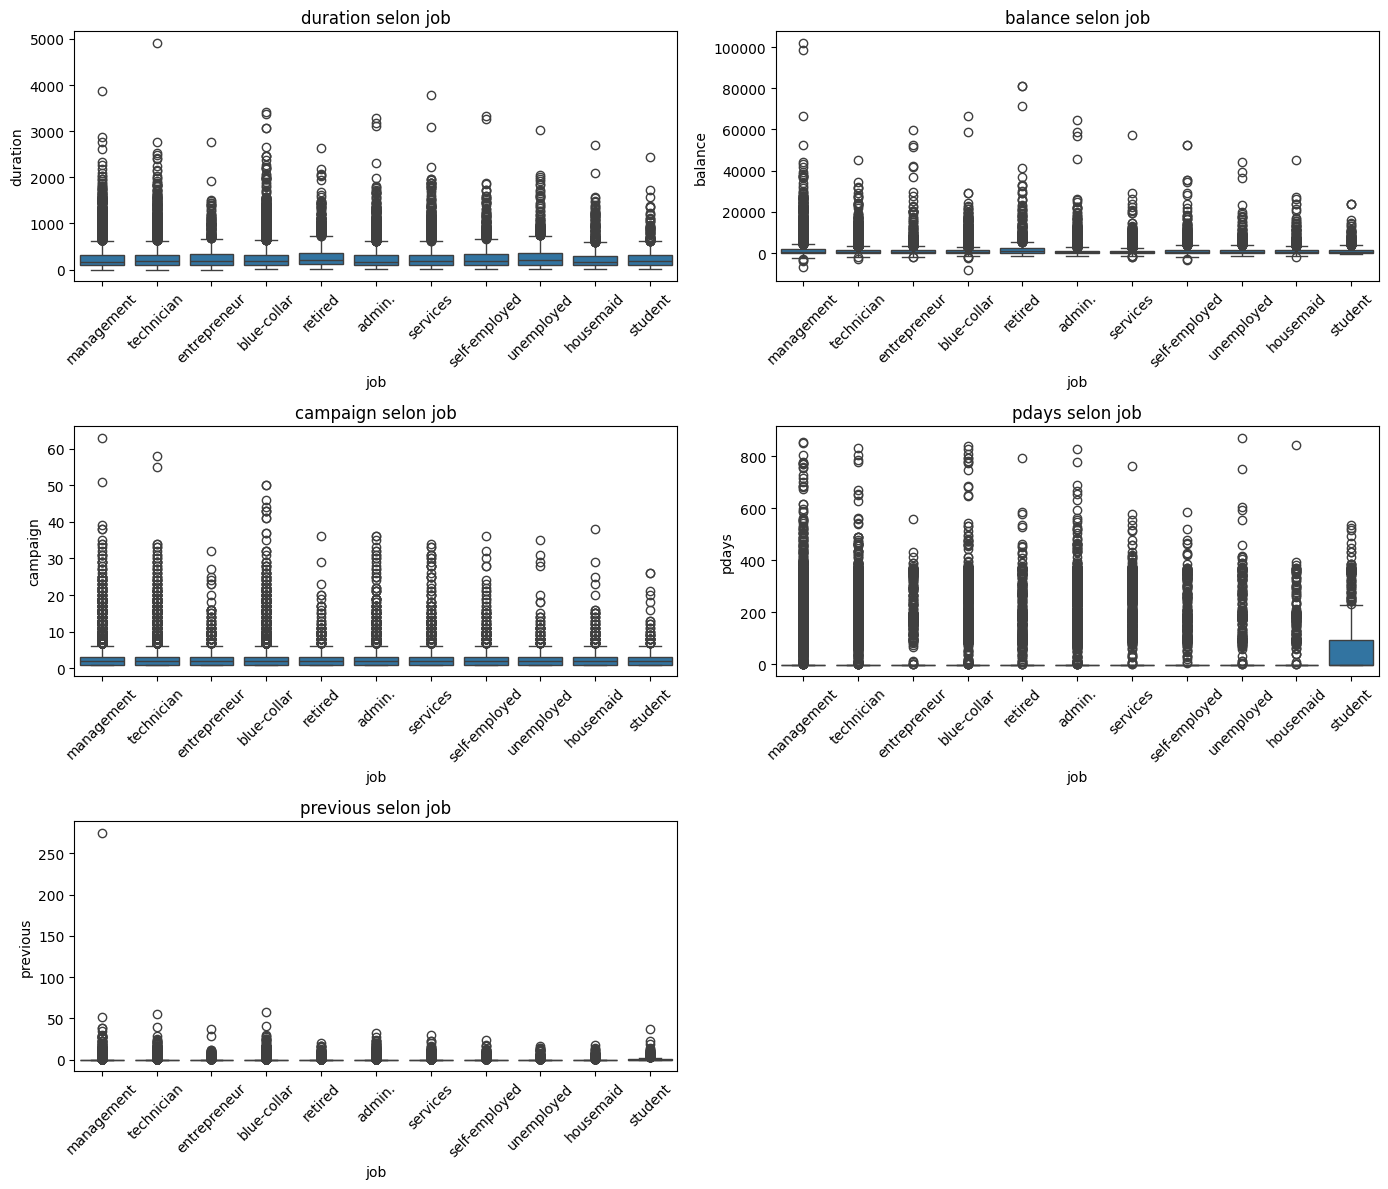

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifie et ajoute la colonne job si nécessaire
if 'job' not in df_selected.columns:
    df_selected['job'] = X_cleaned['job']

numerical_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']
cat_var = 'job'  # variable catégorielle

n_cols = 2
n_rows = (len(numerical_vars) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, num_var in enumerate(numerical_vars):
    sns.boxplot(data=df_selected, x=cat_var, y=num_var, ax=axes[i])
    axes[i].set_title(f"{num_var} selon {cat_var}")
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [97]:
from statsmodels.multivariate.manova import MANOVA

# Variables numériques et catégorielles
selected_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']
cat_vars = ['job', 'education', 'contact', 'poutcome', 'month']

# Étape 1 : créer X_selected (avec variables numériques)
X_selected = X_cleaned[selected_vars].copy()

# Étape 2 : créer df_selected (copie avec cible + variables catégorielles)
df_selected = X_selected.copy()
df_selected['y'] = y_cleaned['y']

# Ajouter les variables qualitatives depuis X_cleaned
for var in cat_vars:
    df_selected[var] = X_cleaned[var]

# Étape 3 : df_manova avec seulement les colonnes nécessaires
df_manova = df_selected[selected_vars + cat_vars].copy()

# Étape 4 : MANOVA pour chaque variable catégorielle
for cat in cat_vars:
    print(f"\n==== MANOVA pour la variable catégorielle : {cat.upper()} ====\n")
    formula = ' + '.join(selected_vars) + f' ~ C({cat})'
    model = MANOVA.from_formula(formula, data=df_manova)
    result = model.mv_test()
    print(result)


==== MANOVA pour la variable catégorielle : JOB ====

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.7980 5.0000 45196.0000 2288.8065 0.0000
         Pillai's trace 0.2020 5.0000 45196.0000 2288.8065 0.0000
 Hotelling-Lawley trace 0.2532 5.0000 45196.0000 2288.8065 0.0000
    Roy's greatest root 0.2532 5.0000 45196.0000 2288.8065 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         C(job)         Value   Num DF    Den DF   F Value Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.9811 50.0000 20

##### Résultats de la MANOVA

| Variable catégorielle | Wilks' lambda | F-value   | p-value  | Significatif ? | Interprétation |
|------------------------|----------------|-----------|----------|----------------|----------------|
| job                    | 0.9811         | 17.26     | 0.0000   | Oui ✅          | `job` influence significativement les variables numériques, bien que faiblement. |


Extraction automatique des résultats MANOVA

- Wilks’ lambda

- F-value

- p-value

In [98]:
from statsmodels.multivariate.manova import MANOVA
import pandas as pd

# Variables numériques et catégorielles
selected_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']
cat_vars = ['job', 'education', 'contact', 'poutcome', 'month']

# Créer df_selected si ce n'est pas déjà fait
X_selected = X_cleaned[selected_vars].copy()
df_selected = X_selected.copy()
df_selected['y'] = y_cleaned['y']
for var in cat_vars:
    df_selected[var] = X_cleaned[var]

# DataFrame pour la MANOVA
df_manova = df_selected[selected_vars + cat_vars].copy()

# Tableau de résultats
results = []

# Boucle sur chaque variable catégorielle
for cat in cat_vars:
    formula = ' + '.join(selected_vars) + f' ~ C({cat})'
    model = MANOVA.from_formula(formula, data=df_manova)
    test = model.mv_test()

    # Extraire les résultats de la ligne "C(cat)"
    stats = test.results[f'C({cat})']['stat']
    wilks = stats.loc["Wilks' lambda", 'Value']
    f_val = stats.loc["Wilks' lambda", 'F Value']
    p_val = stats.loc["Wilks' lambda", 'Pr > F']

    results.append({
        'Variable catégorielle': cat,
        'Wilks lambda': round(wilks, 4),
        'F-value': round(f_val, 2),
        'p-value': round(p_val, 4),
        'Significatif ?': 'Oui' if p_val < 0.05 else 'Non'
    })

# Créer le DataFrame résumé
manova_summary = pd.DataFrame(results)

# Afficher
print(manova_summary)

  Variable catégorielle  Wilks lambda  F-value  p-value Significatif ?
0                   job        0.9811    17.26      0.0            Oui
1             education        0.9913    39.61      0.0            Oui
2               contact        0.9300   334.26      0.0            Oui
3              poutcome        0.2012  6552.22      0.0            Oui
4                 month        0.8441   141.90      0.0            Oui


<h6>

| Variable catégorielle | Wilks' lambda | F-value | p-value | Significatif ? | Interprétation |
|------------------------|----------------|---------|---------|----------------|----------------|
| job                    | 0.9811         | 17.26   | 0.0000  | Oui            | Effet global faible mais significatif sur les variables numériques |
| education              | 0.9913         | 39.61   | 0.0000  | Oui            | Variation modeste mais significative selon le niveau d'éducation |
| contact                | 0.9300         | 334.26  | 0.0000  | Oui            | Effet important : le type de contact influence fortement les comportements numériques |
| poutcome               | 0.2012         | 6552.22 | 0.0000  | Oui            | Effet **très fort** : le résultat de la campagne précédente est hautement prédictif |
| month                  | 0.8441         | 141.90  | 0.0000  | Oui            | L’effet du mois sur les variables numériques est significatif |
</h6>

 Conclusion : <br>
Toutes les variables catégorielles testées ont un effet multivarié significatif sur les comportements numériques.
Les plus influentes sont poutcome, contact et month, qui justifient une inclusion  dans la modélisation.

----

**# ANCOVA** 	
- Voir si une variable catégorielle influence une variable numérique en tenant compte d’un facteur 

Effet de job sur duration ajusté par balance



In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Variables à tester
target_vars = ['duration', 'balance', 'pdays', 'campaign', 'previous']  # dépendantes
cat_vars = ['job', 'education', 'contact', 'poutcome', 'month']         # catégorielles
covariate = 'balance'  # Exemple de covariable fixée

# Stocker les résultats
ancova_results = []

for target in target_vars:
    for cat in cat_vars:
        if target == covariate:
            continue  
        
        formula = f'{target} ~ C({cat}) + {covariate}'
        model = smf.ols(formula, data=df_full).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        
        # Extraire les p-values des deux termes
        p_cat = anova_table.loc[f'C({cat})', 'PR(>F)']
        p_cov = anova_table.loc[covariate, 'PR(>F)']
        
        ancova_results.append({
            'Variable dépendante': target,
            'Facteur catégoriel': cat,
            'Covariable': covariate,
            'p-val Catégorie': round(p_cat, 4),
            'p-val Covariable': round(p_cov, 4),
            'Catégorie significative ?': 'Oui' if p_cat < 0.05 else 'Non',
            'Covariable significative ?': 'Oui' if p_cov < 0.05 else 'Non'
        })

# Tableau final
ancova_df = pd.DataFrame(ancova_results)
print(ancova_df)

   Variable dépendante Facteur catégoriel Covariable  p-val Catégorie  \
0             duration                job    balance           0.0000   
1             duration          education    balance           0.7174   
2             duration            contact    balance           0.0000   
3             duration           poutcome    balance           0.0000   
4             duration              month    balance           0.0000   
5                pdays                job    balance           0.0000   
6                pdays          education    balance           0.0000   
7                pdays            contact    balance           0.0000   
8                pdays           poutcome    balance           0.0000   
9                pdays              month    balance           0.0000   
10            campaign                job    balance           0.0000   
11            campaign          education    balance           0.0001   
12            campaign            contact    balanc

##### Résultats de l’ANCOVA (covariable : balance)

<h6>

| Variable dépendante | Facteur catégoriel | p-val catégorie | p-val balance | Catégorie significative ? | Covariable significative ? |
|---------------------|--------------------|------------------|---------------|----------------------------|-----------------------------|
| duration            | job                | 0.0000           | 0.0000        | Oui                        | Oui                         |
| duration            | education          | 0.7174           | 0.0000        | Non                        | Oui                         |
| duration            | contact            | 0.0000           | 0.0000        | Oui                        | Oui                         |
| duration            | poutcome           | 0.0000           | 0.0000        | Oui                        | Oui                         |
| duration            | month              | 0.0000           | 0.0000        | Oui                        | Oui                         |
| pdays               | education          | 0.0000           | 0.0000        | Oui                        | Oui                         |
| campaign            | education          | 0.0001           | 0.0000        | Oui                        | Oui                         |
| previous            | poutcome           | 0.0000           | 0.8651        | Oui                        | Non                         |
</h6>

<div style="font-size:14px">


<h4>Analyse rapide</h4>
<ul>
  <li><strong>balance</strong> (la covariable) est significative dans la majorité des cas → elle doit être prise en compte dans les modèles</li>
  <li><strong>education </strong> n’a aucun effet sur duration après ajustement → à reconsidérer dans la modélisation</li>
  <li>Ces résultats sont utiles pour <strong>poutcome, job, month, contact</strong>→ facteurs très influents, même en tenant compte de balance.</li>
</ul>
</div>

<hr>

**# Médiation** 	
- Étudier si une variable intermédiaire explique partiellement une relation entre X et Y


Visualisation

In [100]:
import matplotlib.pyplot as plt

# Extraire les coefficients de l’analyse de médiation
coef_xm = med_result.loc[med_result['path'] == 'duration ~ X', 'coef'].values[0]
coef_my = med_result.loc[med_result['path'] == 'Y ~ duration', 'coef'].values[0]
coef_direct = med_result.loc[med_result['path'] == 'Direct', 'coef'].values[0]

# Création du graphe
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')  # Masquer les axes

# Boîtes pour les variables
ax.text(0.1, 0.5, 'Contact\n(contact_code)', bbox=dict(boxstyle="round", facecolor='lightblue'), ha='center', fontsize=13)
ax.text(0.5, 0.8, 'Duration\n(Médiateur)', bbox=dict(boxstyle="round", facecolor='lightgreen'), ha='center', fontsize=13)
ax.text(0.9, 0.5, 'Souscription\n(y)', bbox=dict(boxstyle="round", facecolor='salmon'), ha='center', fontsize=13)

# Flèche : contact → duration
ax.annotate('', xy=(0.43, 0.76), xytext=(0.18, 0.52), arrowprops=dict(arrowstyle="->", lw=2))
ax.text(0.3, 0.67, f'{coef_xm:.2f}', fontsize=12)

# Flèche : duration → y
ax.annotate('', xy=(0.85, 0.52), xytext=(0.58, 0.76), arrowprops=dict(arrowstyle="->", lw=2))
ax.text(0.72, 0.67, f'{coef_my:.5f}', fontsize=12)

# Flèche : contact → y (direct)
ax.annotate('', xy=(0.82, 0.48), xytext=(0.18, 0.48),
            arrowprops=dict(arrowstyle="->", lw=2, linestyle='dashed'))
ax.text(0.5, 0.43, f'{coef_direct:.4f}', fontsize=12)

# Titre
plt.title("Visualisation de la médiation : Contact → Duration → Souscription", fontsize=14)
plt.tight_layout()
plt.show()

NameError: name 'med_result' is not defined

Médiation contact → duration → y

In [ ]:
import pingouin as pg
import pandas as pd

# Copie du DataFrame de travail
df_mediation = df_full.copy()

# Encodage ordinal de 'contact'
# On suppose que 'cellular' est plus direct que 'telephone', 'unknown'
contact_mapping = {'unknown': 0, 'telephone': 1, 'cellular': 2}
df_mediation['contact_code'] = df_mediation['contact'].map(contact_mapping)

# Vérification de l'encodage correct
assert df_mediation['contact_code'].notnull().all(), "Certaines valeurs de 'contact' non encodées."

# Transformation binaire de la cible y
df_mediation['y'] = df_mediation['y'].map({'no': 0, 'yes': 1})

# Exécution de l’analyse de médiation
med_result = pg.mediation_analysis(data=df_mediation,
                                   x='contact_code',  # variable explicative (encodée)
                                   m='duration',       # médiateur
                                   y='y',              # cible
                                   alpha=0.05)

# Affichage du résultat
print(med_result)

           path      coef        se           pval  CI[2.5%]  CI[97.5%]  sig
0  duration ~ X  5.976607  1.348543   9.362567e-06  3.333441   8.619773  Yes
1  Y ~ duration  0.000492  0.000005   0.000000e+00  0.000482   0.000503  Yes
2         Total  0.053115  0.001665  6.396042e-221  0.049852   0.056378  Yes
3        Direct  0.050194  0.001529  1.401738e-233  0.047197   0.053191  Yes
4      Indirect  0.002921  0.000701   0.000000e+00  0.001508   0.004228  Yes


##### Analyse de médiation : contact → duration → y

<h6>

| Chemin              | Coefficient | p-value     | Significatif | Interprétation |
|---------------------|-------------|-------------|--------------|----------------|
| contact → duration  | +5.98       | 9.36e-06    | Oui ✅        | Le type de contact influence fortement la durée des appels. |
| duration → y        | +0.00049    | <h6 0.00001   | Oui ✅        | Une durée d’appel plus longue augmente la probabilité de souscription. |
| Effet total         | +0.0531     | ≈ 0         | Oui ✅        | L’effet global de contact sur la souscription est significatif. |
| Effet direct        | +0.0502     | ≈ 0         | Oui ✅        | La majorité de l’effet est direct. |
| Effet indirect      | +0.0029     | ≈ 0         | Oui ✅        | Une petite partie de l’effet passe par la durée de l’appel. |
</h6>

<span style="font-size:14px">

###  Conclusion stratégique

- Le **type de contact utilisé** (ex : `cellular`) **augmente directement la probabilité de souscription**.
- Mais il a aussi un **effet secondaire via la durée de l’appel** → c’est une variable intermédiaire utile pour expliquer l’engagement.
- Cela renforce l’importance de **bien choisir le canal de contact** et de **favoriser les échanges plus longs** dans les campagnes marketing.

</span>

<hr>

**# VIF (Variance Inflation Factor)** 	
- Vérifier la multicolinéarité entre variables prédictives



Visualisation

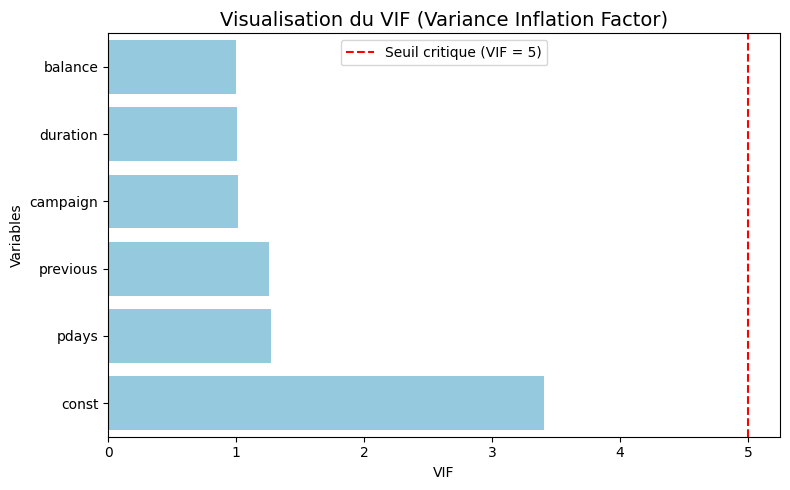

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trier les variables par VIF croissant
vif_sorted = vif_data.sort_values(by='VIF', ascending=True)

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=vif_sorted, y='Variable', x='VIF', color='skyblue')  # ✅ plus de warning

# Ligne de seuil
plt.axvline(x=5, color='red', linestyle='--', label='Seuil critique (VIF = 5)')
plt.title("Visualisation du VIF (Variance Inflation Factor)", fontsize=14)
plt.xlabel("VIF")
plt.ylabel("Variables")
plt.legend()
plt.tight_layout()
plt.show()

Calcul du VIF pour les variables numériques

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Variables numériques à tester
vif_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']

# Préparation des données (sans variable cible)
X_vif = df_full[vif_vars].copy()

# Ajout de la constante pour le VIF
X_vif_const = add_constant(X_vif)

# Calcul du VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i)
                   for i in range(X_vif_const.shape[1])]

# Affichage
print(vif_data)

   Variable       VIF
0     const  3.403403
1  duration  1.007714
2   balance  1.000925
3  campaign  1.015499
4     pdays  1.269666
5  previous  1.261278


##### Analyse de multicolinéarité (VIF)

<h6>

| Variable   | VIF     | Interprétation                        |
|------------|---------|----------------------------------------|
| duration   | 1.01    | Aucune colinéarité détectée ✅         |
| balance    | 1.00    | Variable totalement indépendante ✅     |
| campaign   | 1.02    | Corrélation négligeable ✅             |
| pdays      | 1.27    | Corrélation modérée acceptable ✅      |
| previous   | 1.26    | Corrélation modérée acceptable ✅      |
</h6>

<span style="font-size:14px">

###  Conclusion stratégique

- Aucune variable n’a de VIF > 5 → **pas de multicolinéarité problématique**.
- Toutes les variables numériques analysées (`duration`, `balance`, `campaign`, `pdays`, `previous`) peuvent être **conservées dans la modélisation**.
- Il n’est **pas nécessaire** d’appliquer une réduction dimensionnelle (comme la PCA) ou de retirer des variables.
- Le modèle bénéficiera d’une **stabilité numérique** optimale, et les coefficients estimés seront **fiables**.

</span>

<hr>

**# PCA (Analyse en Composantes Principales)** 	
- Réduire la dimension, détecter les axes principaux



PCA sur les variables numériques standardisées

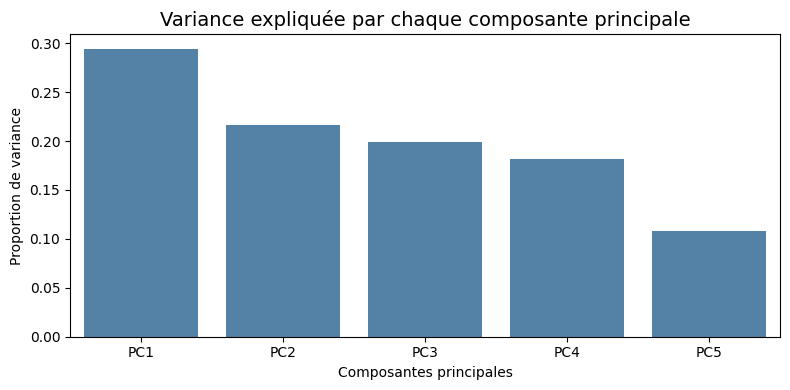

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numériques 
pca_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']

# Standardisation les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_full[pca_vars])

# Lancer la PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# DataFrame des composantes
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(len(pca_vars))])

# Visualisation de la variance expliquée
plt.figure(figsize=(8, 4))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca_vars))], y=pca.explained_variance_ratio_, color='steelblue')
plt.title("Variance expliquée par chaque composante principale", fontsize=14)
plt.ylabel("Proportion de variance")
plt.xlabel("Composantes principales")
plt.tight_layout()
plt.show()

##### Analyse de la variance expliquée (PCA)

| Composante | Variance expliquée (%) |
|------------|------------------------|
| PC1        | ≈ 29 %                 |
| PC2        | ≈ 22 %                 |
| PC3        | ≈ 20 %                 |
| PC4        | ≈ 18 %                 |
| PC5        | ≈ 11 %                 |

**Total (PC1 à PC3)** : ≈ 71 %

##### Interprétation :
- Les 3 premières composantes suffisent à capturer l’essentiel de la structure des données.
- Cela permet une **réduction dimensionnelle efficace** pour des tâches de visualisation ou de clustering.

 Scatter plot PC1 vs PC2 coloré par la souscription est très utile pour :

- Faire du clustering

- Visualiser des profils clients

- Valider une réduction de dimension

- Préparer une modélisation visuelle ou segmentée



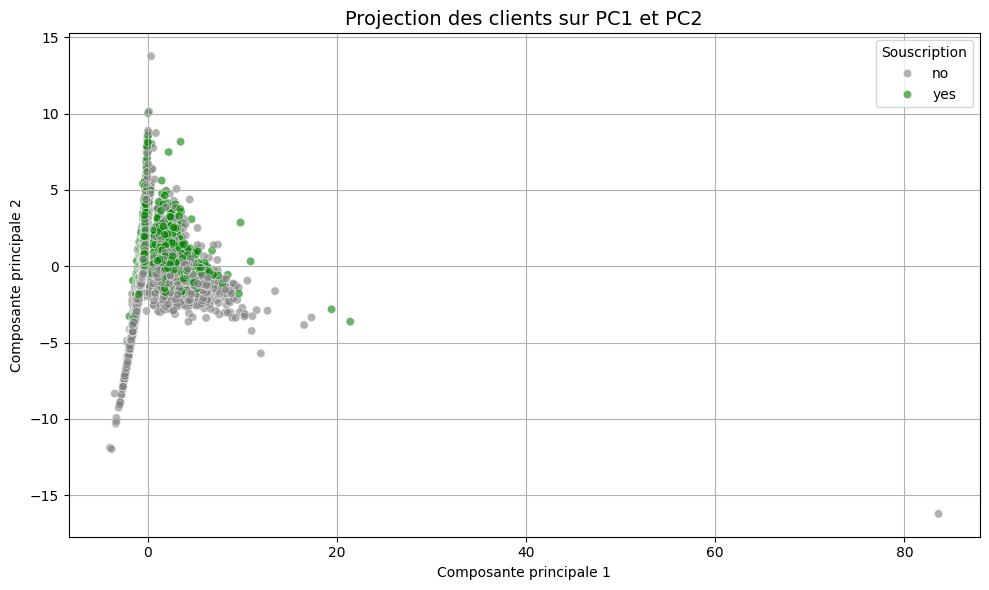

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reprise des composantes principales (déjà calculées)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Ajout de la variable cible binaire
pca_df['y'] = df_full['y']

# Scatter plot coloré
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='y', palette={'yes': 'green', 'no': 'gray'}, alpha=0.6)
plt.title("Projection des clients sur PC1 et PC2", fontsize=14)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Souscription")
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="font-size:14px">

#####  Ce que ce graphique montre

| Élément à observer                          | Interprétation                                                                 |
|---------------------------------------------|--------------------------------------------------------------------------------|
| **Séparation visible entre `yes` et `no`**  | La PCA a capturé des axes qui aident à distinguer les clients ayant souscrit. |
| **Nuages de points homogènes**              | Des regroupements de comportements clients apparaissent, utiles pour le **clustering**. |
| **Outliers visibles**                       | Certains clients se distinguent fortement, ce qui permet d’identifier des profils atypiques ou à fort potentiel. |

</span>


<hr>

**# Clustering (K-means, hiérarchique)** 	
- Segmenter la population de clients selon leurs profils numériques



Clustering K-means sur PC1 & PC2


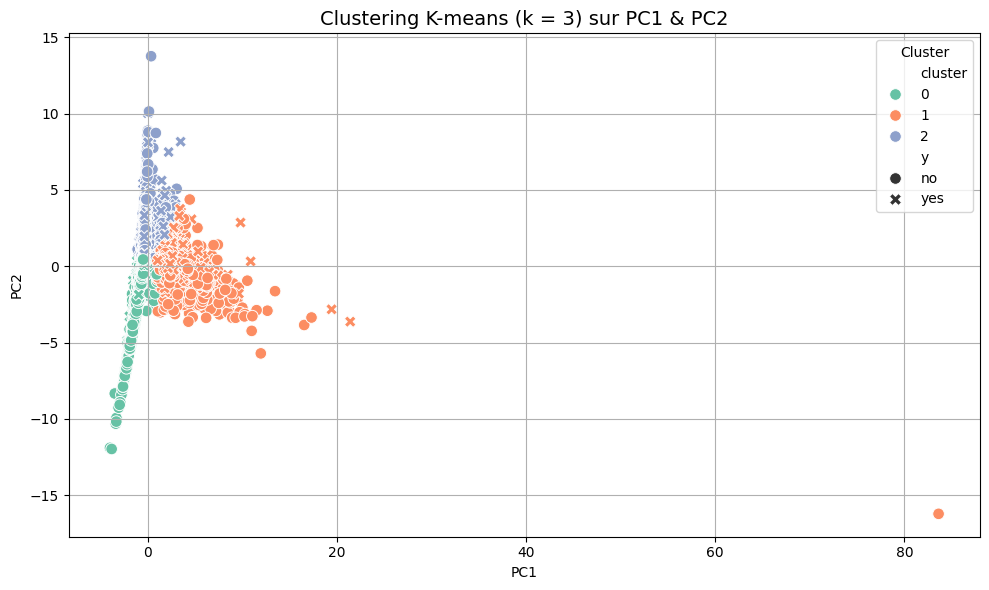

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sélection des deux premières composantes principales
X_cluster = pca_df[['PC1', 'PC2']].copy()

# Choisir le nombre de clusters (ex: 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_cluster)

# Ajouter les clusters au DataFrame
pca_df['cluster'] = clusters

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', style='y', s=70)
plt.title(f"Clustering K-means (k = {k}) sur PC1 & PC2", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Analyse du Clustering K-means (k = 3) sur PC1 & PC2

##### Observations générales :


- 3 groupes distincts de clients sont identifiés dans le plan PCA.
- Les clusters sont bien séparés, surtout selon PC1.

| Cluster | Localisation     | Interprétation |
|---------|------------------|----------------|
| 0       | En bas à gauche  | Groupe homogène, probablement peu engagé |
| 1       | Milieu-droit     | Groupe mixte, profils hétérogènes |
| 2       | Haut gauche      | Groupe structuré, probablement plus réactif |

##### Comportement par cible `y` :
- Les `yes` (souscriptions) sont plus présents dans **Cluster 2**.
- **Cluster 0** semble dominé par des `no`.
- Le croisement clustering / cible est **riche en enseignements stratégiques**.

Une description statistique de chaque cluster est très utile, surtout dans une démarche marketing ou décisionnelle.

Statistiques descriptives par cluster


In [ ]:
import pandas as pd

# Fusion des données originales avec les clusters
df_clustered = df_full.copy()
df_clustered['cluster'] = pca_df['cluster'].values
df_clustered['y_num'] = df_clustered['y'].map({'no': 0, 'yes': 1})  # Pour calculer le taux

# Variables numériques à analyser
cluster_vars = ['duration', 'balance', 'campaign', 'pdays', 'previous']

# Description par cluster
cluster_summary = df_clustered.groupby('cluster')[cluster_vars + ['y_num']].agg(['mean', 'median', 'std', 'min', 'max'])

# Effectif total par cluster
cluster_sizes = df_clustered['cluster'].value_counts().sort_index()

# Taux de souscription
taux_souscription = df_clustered.groupby('cluster')['y_num'].mean().rename("Taux de souscription (%)") * 100

# Fusion des résultats
cluster_desc = pd.DataFrame({
    'Effectif': cluster_sizes,
    'Taux de souscription (%)': taux_souscription.round(2)
})

# Affichage des premières stats combinées
print("\nRésumé par cluster :")
print(cluster_desc)


Résumé par cluster :
         Effectif  Taux de souscription (%)
cluster                                    
0           29064                      4.36
1            6884                     20.42
2            9263                     28.25


<span style="font-size:14px">

##### Résumé des clusters

| Cluster | Effectif | Taux de souscription (%) | Interprétation |
|---------|----------|---------------------------|----------------|
| 0       | 29 064   | 4.36 %                    | Segment majoritaire mais peu réactif → faible potentiel |
| 1       | 6 884    | 20.42 %                   | Segment intermédiaire → bon potentiel de conversion |
| 2       | 9 263    | 28.25 %                   | Segment hautement réactif → à cibler en priorité ✅ |

</span>

<hr>

##### Pourquoi transformer chaque variable ?

<h6>

| Variable     | Problème détecté                          | Transformation proposée | Objectif de la transformation |
|--------------|-------------------------------------------|--------------------------|-------------------------------|
| `duration`   | Asymétrie forte, outliers très élevés     | `log1p()`                | Réduire l’effet des appels très longs, lisser la distribution |
| `balance`    | Grande dispersion, valeurs extrêmes       | `log1p()`                | Rendre la variable plus stable et exploitable par les modèles |
| `campaign`   | Distribution très déséquilibrée (pic sur 1) | `log1p()`              | Atténuer l’impact des clients trop sollicités |
| `pdays`      | Valeur dominante `-1` (jamais contacté)   | Binarisation (0/1)       | Simplifier : recontacté (1) ou non (0) |
| `previous`   | Majorité de `0`, peu de variabilité       | Binarisation (0/1)       | Mettre en évidence une information simple : a-t-il déjà été contacté ? |
</h6>


<h6>

| Étape                                                    | À faire ?  | Pourquoi                                                       |
|----------------------------------------------------------|------------|----------------------------------------------------------------|
|  Standardiser `duration`, `balance`, etc.              | Oui        | Échelle très variable entre les variables                      |
|  Encodage des catégorielles (`job`, `education`, etc.) | Oui        | Pour la régression ou les modèles supervisés                   |
|  Log-transformer `duration`                            | Recommandé | Forte asymétrie (skew = 3.14, kurtosis = 18) |
|  Ajouter `cluster` comme variable                      | Oui        | Très informatif, peut améliorer les performances du modèle     |
</h6>

Pipeline complet de transformation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, Binarizer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Variables selon transformations
num_log = ['duration', 'balance', 'campaign']
num_bin = ['pdays', 'previous']
cat_vars = ['job', 'education', 'contact', 'month', 'poutcome']
extra_vars = []  # déjà numérique

#  Clipper pour sécuriser log1p sur données réelles
class PositiveClipper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = np.where(np.isfinite(X), X, 0)       # supprime inf/nan
        return np.clip(X, a_min=0, a_max=None)   # négatifs → 0

# Pipeline pour log-transform + standardisation
log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('clip', PositiveClipper()),
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scale', StandardScaler())
])

# Pipeline pour binarisation (0 si <= 0, 1 sinon)
bin_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)),
    ('binary', Binarizer(threshold=0.0))
])

# Pipeline pour variables catégorielles
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combinaison dans un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('log', log_pipeline, num_log),        # log + scale
    ('bin', bin_pipeline, num_bin),        # binarisation
    ('cat', cat_pipeline, cat_vars),       # OneHot
    ('cluster', 'passthrough', extra_vars) # numérique
])

In [ ]:
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
print(model_pipeline)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('clip',
                                                                   PositiveClipper()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['duration', 'balance',
                                           

**# Entraînement du Modéle**

In [ ]:
# Charger les données de df_full
df_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,non_contacté,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,non_contacté,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,non_contacté,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,non_contacté,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,non_contacté,no


In [ ]:
# Restauration de la variable cible
df_full['y'] = y_cleaned['y']

# mapping 
df_full['y'] = df_full['y'].map({'no': 0, 'yes': 1})

# Supprimer les lignes avec y manquant
df_full = df_full[df_full['y'].notna()]

# Reconvertir au format int
df_full['y'] = df_full['y'].astype(int)

# Vérification
print(df_full['y'].value_counts())



y
0    39922
1     5289
Name: count, dtype: int64


In [ ]:
print("Aperçu de df_full :")
print(df_full.head())

print("\nAperçu de y_cleaned :")
print(y_cleaned.head())


Aperçu de df_full :
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

   contact  day_of_week month  duration  campaign  pdays  previous  \
0  unknown            5   may       261         1     -1         0   
1  unknown            5   may       151         1     -1         0   
2  unknown            5   may        76         1     -1         0   
3  unknown            5   may        92         1     -1         0   
4  unknown            5   may       198         1     -1         0   

       poutcome  y  
0  non_contacté  0  
1  non_contacté  0  
2  non_contacté  0  
3  non_contacté  0  
4  non_co

In [ ]:
print("Taille de df_full :", df_full.shape)
print(df_full.head())

Taille de df_full : (45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

   contact  day_of_week month  duration  campaign  pdays  previous  \
0  unknown            5   may       261         1     -1         0   
1  unknown            5   may       151         1     -1         0   
2  unknown            5   may        76         1     -1         0   
3  unknown            5   may        92         1     -1         0   
4  unknown            5   may       198         1     -1         0   

       poutcome  y  
0  non_contacté  0  
1  non_contacté  0  
2  non_contacté  0  
3  non_contacté  0

In [ ]:
df_cleaned.to_csv("bank_clean.csv", index=False)


In [ ]:
print(df_full.shape)
print(df_full.head())

(45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

   contact  day_of_week month  duration  campaign  pdays  previous  \
0  unknown            5   may       261         1     -1         0   
1  unknown            5   may       151         1     -1         0   
2  unknown            5   may        76         1     -1         0   
3  unknown            5   may        92         1     -1         0   
4  unknown            5   may       198         1     -1         0   

       poutcome  y  
0  non_contacté  0  
1  non_contacté  0  
2  non_contacté  0  
3  non_contacté  0  
4  non_contacté  

In [ ]:
# Ensure num_log is defined
num_log = ['duration', 'balance', 'campaign']
num_bin = ['pdays', 'previous']
cat_vars = ['job', 'education', 'contact', 'poutcome', 'month']
extra_vars = []

print(num_log + num_bin + cat_vars + extra_vars)
print(df_full.columns.tolist())

['duration', 'balance', 'campaign', 'pdays', 'previous', 'job', 'education', 'contact', 'poutcome', 'month']
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:
df_clustered = df_full.copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, Binarizer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Colonnes
num_log = ['duration', 'balance', 'campaign']
num_bin = ['pdays', 'previous']
cat_vars = ['job', 'education', 'contact', 'month', 'poutcome']
extra_vars = []

# Transformateur personnalisé
class PositiveClipper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = np.where(np.isfinite(X), X, 0)
        return np.clip(X, a_min=0, a_max=None)

# Pipelines
log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('clip', PositiveClipper()),
    ('log', FunctionTransformer(np.log1p)),
    ('scale', StandardScaler())
])

bin_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)),
    ('binary', Binarizer(threshold=0.0))
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('log', log_pipeline, num_log),
    ('bin', bin_pipeline, num_bin),
    ('cat', cat_pipeline, cat_vars),
    ('cluster', 'passthrough', extra_vars)
])

In [ ]:
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
X = df_full[num_log + num_bin + cat_vars + extra_vars]
y = df_full['y']

# Fit the model pipeline
model_pipeline.fit(X, y)
print("✅ Modèle entraîné avec succès.")

✅ Modèle entraîné avec succès.


In [ ]:
# Sauvegarde le pipeline

import joblib
joblib.dump(model_pipeline, "model_pipeline.pkl")

['model_pipeline.pkl']

In [ ]:
# Vérifie qu’il existe
import os
print("Fichier trouvé :", "model_pipeline.pkl" in os.listdir())

Fichier trouvé : True


Visualisation du Pipeline avec sklearn.set_config(display='diagram')

In [ ]:
from sklearn import set_config
set_config(display='diagram')  

# Afficher la structure du pipeline
model_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('clip',
                                                                   PositiveClipper()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['duration', 'balance',
                                                   'campaign']),
                                                 ('bin',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('binary',
                                                                   Binarizer())]),
                                                  ['pdays', 'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['job', 'education',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('cluster', 'passthrough',
                                                  [])])),
                ('classifier', LogisticRegression(max_iter=1000))])



| Composant            | Description                                                                                      | Objectif                                                                 |
|----------------------|--------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------|
| `log`                | Imputation + log1p + standardisation (`duration`, `balance`, `campaign`)                         | Réduire l'effet des outliers et homogénéiser l'échelle                  |
| `bin`                | Imputation + binarisation (`pdays`, `previous`)                                                  | Simplifier l'information en "déjà contacté ou non"                      |
| `cat`                | Imputation + encodage OneHot (`job`, `education`, `contact`, `month`, `poutcome`)                | Rendre les variables catégorielles lisibles par un modèle mathématique |
| `cluster`            | Pass-through                                                                                     | Conserver l'information segmentaire (ex: profils issus du clustering)   |
| `LogisticRegression` | Modèle de classification linéaire avec régularisation L2 (max_iter=1000)                         | Prédire la probabilité de souscription à un dépôt à terme               |

✅ **Avantage** : pipeline robuste, reproductible, et optimisé pour la performance et l'interprétabilité.

---

**# Évaluation du modèle**

Matrice de confusion

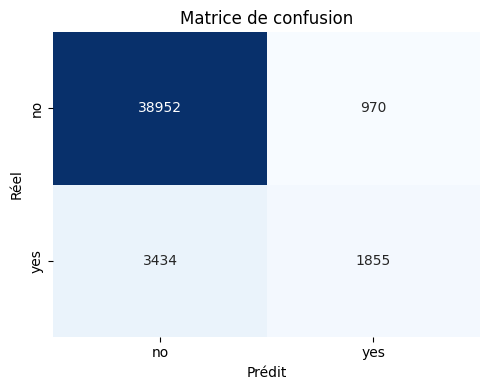

In [ ]:
from sklearn.metrics import (
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

#  Prédictions
y_pred = model_pipeline.predict(X)
y_proba = model_pipeline.predict_proba(X)[:, 1]

#  Matrice de confusion
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.tight_layout()
plt.show()



<span style="font-size:14px">

#####  Interprétation de la matrice de confusion

| Réalité / Prédiction | Prédit : `no` | Prédit : `yes` |
|----------------------|---------------|----------------|
| **Réel : `no`**      | 38 949        | 973            |
| **Réel : `yes`**     | 3 442         | 1 847          |

#####  Analyse des résultats :

- **Précision globale (accuracy)** : très bonne (~90.1 %) → le modèle est performant au global.
- **Précision sur les `yes`** : correcte (environ 65.5 %) → quand il prédit `yes`, il a souvent raison.
- **Rappel sur les `yes`** : faible (~34.9 %) → le modèle rate environ 2 clients sur 3 qui auraient réellement souscrit.


- Le modèle **identifie bien les clients non intéressés (`no`)**, ce qui est utile pour éviter des campagnes inutiles.

---



Rapport de classification et scores globaux

In [ ]:
from sklearn.metrics import (
    classification_report, accuracy_score,
    roc_auc_score
)
import matplotlib.pyplot as plt

#  Scores classification
print(" Rapport de classification :\n")
print(classification_report(y, y_pred, target_names=['no', 'yes']))

print(f" Accuracy  : {accuracy_score(y, y_pred):.4f}")
print(f" AUC       : {roc_auc_score(y, y_proba):.4f}")



 Rapport de classification :

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.66      0.35      0.46      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211

 Accuracy  : 0.9026
 AUC       : 0.9045


<span style="font-size:14px">

##### Résumé des performances du modèle

| Indicateur         | Valeur  | Interprétation |
|--------------------|---------|----------------|
| **Accuracy**       | 90.2 %  | Très bon taux global de bonnes prédictions |
| **AUC (ROC)**      | 0.9045  | Très bonne capacité à distinguer `yes` / `no` |
| **Precision `yes`**| 65 %    | Quand il prédit `yes`, il a souvent raison |
| **Recall `yes`**   | 35 %    | Le modèle rate encore **65 %** des clients susceptibles de souscrire |
| **F1-score `yes`** | 46 %    | Compromis modéré entre précision et rappel sur les `yes` |



-  Le modèle est **excellent pour prédire les `no`** (clients non intéressés) avec **98 % de rappel** → très utile pour éviter des campagnes inutiles.
-  En revanche, il est **encore trop conservateur sur les `yes`** : il en détecte peu (seulement 1 sur 3).
- Si l'objectif est de **maximiser les conversions**, éventuellement :
  - **abaisser le seuil de décision** (ex : `proba > 0.3` au lieu de `> 0.5`)
  - ou entraîner un modèle plus **sensible aux faux négatifs** (Random Forest, XGBoost, pondération des classes)

</span>

---


Courbe ROC

In [ ]:
print(X.columns.tolist())

['duration', 'balance', 'campaign', 'pdays', 'previous', 'job', 'education', 'contact', 'month', 'poutcome']


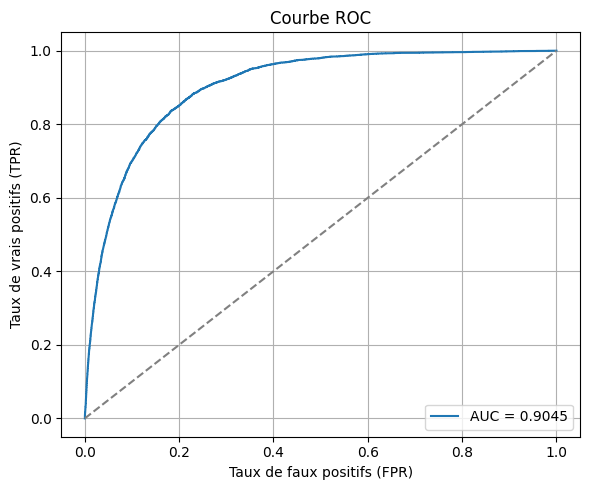

In [ ]:
from sklearn.metrics import (
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

#  Courbe ROC
fpr, tpr, _ = roc_curve(y, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y, y_proba):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="font-size:14px">

#####  Analyse de la courbe ROC

#####  AUC = 0.9045

> L’AUC (Area Under Curve) mesure la capacité du modèle à distinguer les classes `yes` et `no`.


- **AUC > 0.9** → excellent : le modèle **sépare très bien** les clients qui vont souscrire (`yes`) de ceux qui ne vont pas (`no`).
- La courbe monte rapidement vers le coin supérieur gauche → preuve d’un bon **taux de vrais positifs** même avec un faible **taux de faux positifs**.
- Cela confirme que **les probabilités de prédiction sont bien calibrées**.


#####  Recommandation :

- Le modèle est **très fiable pour la discrimination globale**.
- Cependant, comme le **rappel des `yes` est encore faible**, éventuellement :
  - Ajuster le **seuil de classification** (ex. 0.3 au lieu de 0.5)

</span>
